# NAME:$\;\;\;\;\;\;\;\;\;\;\;$   TINOTENDA MHLANGA
# STUDENT ID:$\;\;\;$                  U164N0908
# FYP: $\;\;\;\;\;\;\;\;\;\;\;\;\;$ DATA SCIENCE FOR REAL ESTATE

<img src="photo.jpg" width="540" height="540" align="left"/>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cufflinks as cf
import seaborn as sns
import numpy as np
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
from pylab import rcParams
from math import *
pd.plotting.register_matplotlib_converters()
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

%matplotlib inline

In [2]:
home_values_all_homes = pd.read_csv('Metro_Zhvi_SingleFamilyResidence.csv', encoding = 'ISO-8859-1')
home_value_1Bedroom = pd.read_csv('Metro_Zhvi_1bedroom.csv', encoding = 'ISO-8859-1')
home_value_2Bedroom = pd.read_csv('Metro_Zhvi_2bedroom.csv', encoding = 'ISO-8859-1')
home_value_3Bedroom = pd.read_csv('Metro_Zhvi_3bedroom.csv', encoding = 'ISO-8859-1')
home_value_4Bedroom = pd.read_csv('Metro_Zhvi_4bedroom.csv', encoding = 'ISO-8859-1')
home_value_5BedroomOrMore = pd.read_csv('Metro_Zhvi_5BedroomOrMore.csv', encoding = 'ISO-8859-1')
sale_prices = pd.read_csv('Sale_Prices_Msa.csv', encoding = 'ISO-8859-1')

## Data Inspection

In [3]:
home_values_all_homes.head()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
0,102001,United States,0,100200.0,100400.0,100600.0,100800.0,101100.0,101400.0,101700.0,...,224200,225400,226700,227600,227600,227600,228100,228900,229800,230500
1,394913,"New York, NY",1,168000.0,168000.0,167900.0,167800.0,167500.0,167400.0,167300.0,...,439400,441200,443600,445500,445900,445600,445500,445500,446000,446700
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,178600.0,178400.0,178200.0,178100.0,177900.0,177800.0,177700.0,...,689000,690600,691500,690300,688600,688400,687400,686400,688000,691500
3,394463,"Chicago, IL",3,145800.0,146400.0,146800.0,146800.0,146500.0,145900.0,144900.0,...,234100,235400,236900,237500,237400,237000,236700,236400,236200,236200
4,394514,"Dallas-Fort Worth, TX",4,117200.0,117200.0,117300.0,117500.0,117600.0,117800.0,117900.0,...,242500,245100,247000,247200,246000,245100,245300,245700,246100,246500


In [4]:
home_values_all_homes.tail()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
790,753925,"Vineyard Haven, MA",790,169100.0,169100.0,169100.0,169200.0,169300.0,169600.0,170000.0,...,827600,831700,832400,830500,827400,824200,823500,825500,831100,835900
791,395142,"Sweetwater, TX",791,42000.0,42000.0,41900.0,41900.0,41900.0,41900.0,41900.0,...,73600,72700,72100,71600,71400,70400,68000,65900,65300,65000
792,394767,"Lamesa, TX",792,50000.0,50000.0,49900.0,49900.0,49900.0,49900.0,49900.0,...,78500,78200,78300,78100,77900,77700,77300,76300,76100,76500
793,395188,"Vernon, TX",793,41100.0,41200.0,41200.0,41300.0,41300.0,41300.0,41300.0,...,65000,65500,66100,66200,65500,64600,64200,64000,63900,64000
794,394743,"Ketchikan, AK",794,117100.0,117200.0,117300.0,117400.0,117500.0,117700.0,117800.0,...,309600,308600,308300,307500,307600,308800,312200,316700,321100,322700


In [5]:
home_value_1Bedroom.head()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
0,102001,United States,0,63100.0,63100.0,63000.0,63000.0,63000.0,63000.0,63000.0,...,170300,171200,172200,172600,172200,171600,171600,171900,172400,172900
1,394913,"New York, NY",1,93200.0,93100.0,92800.0,92500.0,92300.0,92000.0,91800.0,...,242100,243400,245000,246300,246800,246200,245600,245400,245800,246200
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,91100.0,91000.0,90700.0,90500.0,90200.0,90000.0,89800.0,...,416600,417200,417500,416900,416200,415800,414100,412100,412400,414200
3,394463,"Chicago, IL",3,69400.0,69900.0,70300.0,70800.0,71200.0,71500.0,71900.0,...,104300,105100,105700,106300,106800,106700,106100,106000,105900,105700
4,394514,"Dallas-Fort Worth, TX",4,54200.0,54100.0,54000.0,53800.0,53600.0,53400.0,53100.0,...,126300,129000,131100,131600,129100,126200,125100,125300,125800,126200


In [6]:
home_value_1Bedroom.tail()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
405,395004,"Prineville, OR",405,48600.0,49000.0,49500.0,49900.0,50400.0,50800.0,51200.0,...,187400,187200,187600,184700,180600,178900,178700,178100,178700,178100
406,395236,"Woodward, OK",406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30700,31100,30900,31000,31300,31300,31300,31100,31200,31600
407,395112,"Spirit Lake, IA",407,38500.0,38700.0,39100.0,39400.0,39600.0,39900.0,40200.0,...,121900,121400,122000,122500,121300,118100,115800,115100,115100,114500
408,753925,"Vineyard Haven, MA",408,109700.0,110100.0,110500.0,111000.0,111500.0,112100.0,112900.0,...,545500,548700,549800,546300,544800,549000,556200,560900,566800,573000
409,753874,"Craig, CO",409,20700.0,20800.0,20900.0,20900.0,21000.0,21000.0,21100.0,...,102000,101500,100900,98600,95700,93500,92400,92400,92500,92100


In [7]:
home_value_2Bedroom.head()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
0,102001,United States,0,76800.0,76800.0,76800.0,76900.0,76900.0,76900.0,77000.0,...,173400,174600,175600,176000,175800,175700,176200,176800,177500,178100
1,394913,"New York, NY",1,118300.0,118100.0,117900.0,117700.0,117600.0,117400.0,117400.0,...,283100,285300,287500,288800,289000,288400,288000,288200,288500,288300
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,136000.0,135700.0,135300.0,135000.0,134600.0,134400.0,134200.0,...,534500,536300,537800,537200,536200,536100,535300,534200,535000,537200
3,394463,"Chicago, IL",3,97900.0,98400.0,99000.0,99600.0,100100.0,100600.0,101000.0,...,156500,157500,159000,159300,158500,157800,157800,157900,158300,158700
4,394514,"Dallas-Fort Worth, TX",4,56400.0,56500.0,56500.0,56700.0,56800.0,57000.0,57100.0,...,147900,151300,154300,155100,153700,152000,151800,152200,153200,154100


In [8]:
home_value_2Bedroom.tail()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
554,395111,"Spencer, IA",554,30100.0,30400.0,30600.0,30900.0,31200.0,31500.0,31800.0,...,89900,90500,90300,89900,89700,90000,90700,91400,91900,92300
555,395112,"Spirit Lake, IA",555,58300.0,58500.0,58600.0,58800.0,58900.0,59000.0,59100.0,...,156400,156600,156700,157000,157300,156700,155800,155900,156800,156900
556,753925,"Vineyard Haven, MA",556,121000.0,121700.0,122500.0,123200.0,124000.0,124800.0,125700.0,...,581900,584600,585900,584000,581400,581300,584200,588200,594000,598700
557,753874,"Craig, CO",557,34600.0,34800.0,34900.0,35000.0,35100.0,35200.0,35300.0,...,130600,131400,131200,129700,128400,128300,128600,128400,128800,129400
558,394743,"Ketchikan, AK",558,95300.0,95300.0,95300.0,95300.0,95400.0,95400.0,95500.0,...,213700,210100,209500,211000,209000,203600,199700,199400,200500,200600


In [9]:
home_value_3Bedroom.head() 

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
0,102001,United States,0,98300.0,98500.0,98600.0,98800.0,99000.0,99300.0,99700.0,...,218200,219500,220800,221400,221200,221100,221700,222400,223400,224100
1,394913,"New York, NY",1,139600.0,139600.0,139700.0,139700.0,139800.0,139800.0,139900.0,...,342900,344900,347800,350000,350500,350200,349900,349700,349900,350100
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,166300.0,166200.0,166000.0,165800.0,165600.0,165400.0,165300.0,...,626000,627900,629200,628500,627300,627200,626400,625600,627200,630300
3,394463,"Chicago, IL",3,131800.0,132300.0,132500.0,132600.0,132300.0,131800.0,131000.0,...,208100,209100,210400,211100,210900,210600,210700,210800,211000,211400
4,394514,"Dallas-Fort Worth, TX",4,95400.0,95600.0,95800.0,96000.0,96200.0,96300.0,96600.0,...,210600,213200,215300,216000,215300,214700,215100,215600,216300,216900


In [10]:
home_value_3Bedroom.tail() 

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
620,395111,"Spencer, IA",620,45900.0,46100.0,46300.0,46400.0,46600.0,46800.0,47000.0,...,126400,127000,126900,127000,127900,128700,128700,128900,129300,129700
621,395112,"Spirit Lake, IA",621,73700.0,73900.0,74100.0,74300.0,74400.0,74500.0,74500.0,...,229900,231500,233000,233800,234200,233900,234200,235700,237600,238300
622,753925,"Vineyard Haven, MA",622,151500.0,151500.0,151400.0,151400.0,151400.0,151400.0,151600.0,...,719700,722600,722200,718500,714000,711300,712800,715200,720400,725200
623,753874,"Craig, CO",623,66100.0,66400.0,66600.0,66700.0,66900.0,67200.0,67400.0,...,193900,193400,191300,192300,197800,203400,205300,206200,206900,207000
624,394743,"Ketchikan, AK",624,116000.0,116100.0,116200.0,116300.0,116400.0,116500.0,116700.0,...,304400,302600,301600,301900,302300,303800,307200,311600,315300,316900


In [11]:
home_value_4Bedroom.head() 

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
0,102001,United States,0,154000.0,154200.0,154300.0,154500.0,154800.0,155000.0,155400.0,...,345800,347600,349400,350500,350700,350500,350600,350700,351200,351900
1,394913,"New York, NY",1,199600.0,199400.0,199100.0,198700.0,198200.0,197800.0,197500.0,...,486700,488300,491500,494000,493800,491300,488500,486500,485100,484400
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,219700.0,219700.0,219600.0,219400.0,219400.0,219400.0,219600.0,...,769500,770500,771000,769300,767300,767000,766800,766100,767500,770800
3,394463,"Chicago, IL",3,196600.0,197300.0,197700.0,197700.0,197400.0,196800.0,195900.0,...,329100,330600,332400,333400,333200,332400,331200,329900,328900,328700
4,394514,"Dallas-Fort Worth, TX",4,184000.0,183900.0,183800.0,183900.0,184100.0,184300.0,184500.0,...,337600,340400,342300,342500,341300,340300,340300,340000,340000,341000


In [12]:
home_value_4Bedroom.tail() 

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
607,395111,"Spencer, IA",607,55700.0,55800.0,55900.0,56100.0,56200.0,56400.0,56600.0,...,156600,157100,156800,156500,157100,158000,158400,158600,159500,160400
608,395112,"Spirit Lake, IA",608,78300.0,78700.0,79100.0,79500.0,80000.0,80400.0,80800.0,...,276800,277000,277100,278200,278400,278600,280400,284100,288300,291200
609,753925,"Vineyard Haven, MA",609,192300.0,193200.0,194200.0,195400.0,196600.0,198000.0,199600.0,...,988900,995600,996200,990500,984400,983200,990600,1000600,1011400,1017800
610,753927,"Winnemucca, NV",610,139000.0,139200.0,139300.0,139400.0,139600.0,139800.0,140200.0,...,398100,404400,407700,408200,408100,408000,405600,400200,394500,391500
611,394743,"Ketchikan, AK",611,146400.0,146500.0,146600.0,146700.0,146800.0,147000.0,147100.0,...,366800,367800,367300,367700,369700,373200,377500,382400,386200,387900


In [13]:
home_value_5BedroomOrMore.head() 

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
0,102001,United States,0,203700.0,204000.0,204300.0,204700.0,205100.0,205700.0,206200.0,...,485700,488100,490400,491900,492600,492600,491800,491000,491700,493100
1,394913,"New York, NY",1,276600.0,276900.0,277100.0,277100.0,277200.0,277300.0,277600.0,...,714300,716600,721200,725400,728100,728000,726600,724200,722100,720400
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,315600.0,315600.0,315800.0,316000.0,316400.0,316900.0,317800.0,...,1106600,1108700,1109700,1106600,1102200,1098700,1095100,1092200,1094400,1099900
3,394463,"Chicago, IL",3,281300.0,282700.0,283500.0,283800.0,283500.0,282800.0,281600.0,...,493200,495300,497700,499200,499200,496900,493100,489400,486100,484400
4,394514,"Dallas-Fort Worth, TX",4,291800.0,289900.0,288500.0,287500.0,286900.0,286500.0,285600.0,...,465900,468200,469200,469400,469900,469700,467900,465100,466500,471000


In [14]:
home_value_5BedroomOrMore.tail() 

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
523,394805,"Los Alamos, NM",523,235000.0,235100.0,235300.0,235300.0,235100.0,234900.0,234600.0,...,457900,458000,460700,463900,463500,462200,462100,464800,468400,470100
524,394342,"Atchison, KS",524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,181800,184600,187700,188700,186200,182700,180400,178400,175300,173300
525,395111,"Spencer, IA",525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,204000,205900,205700,203200,201100,202100,203800,204600,206900,210200
526,753925,"Vineyard Haven, MA",526,363000.0,363100.0,363300.0,363500.0,363800.0,364100.0,364600.0,...,1712400,1723100,1723500,1709800,1693900,1690500,1703100,1723000,1740700,1744600
527,753874,"Craig, CO",527,95600.0,95800.0,95800.0,95800.0,95800.0,95800.0,95800.0,...,298200,299800,298100,296400,303100,311200,309100,301700,298600,296900


In [15]:
home_values_all_homes.describe()

,RegionID,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
count,795.000000,795.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,...,7.950000e+02,7.950000e+02,7.950000e+02,7.950000e+02,7.950000e+02,7.950000e+02,7.950000e+02,7.950000e+02,7.950000e+02,7.950000e+02
mean,412926.631447,397.000000,82344.692737,82397.625698,82450.698324,82509.916201,82585.754190,82689.804469,82827.793296,83003.072626,...,1.829907e+05,1.838836e+05,1.845390e+05,1.847244e+05,1.845770e+05,1.845459e+05,1.848756e+05,1.854819e+05,1.865332e+05,1.874345e+05
std,80235.848394,229.641024,39124.938300,39021.345888,38906.548421,38798.819454,38708.690315,38654.142896,38642.589225,38670.394401,...,1.244107e+05,1.248142e+05,1.250870e+05,1.250393e+05,1.246996e+05,1.242820e+05,1.239434e+05,1.237405e+05,1.239204e+05,1.243452e+05
min,102001.000000,0.000000,23900.000000,23900.000000,23900.000000,23900.000000,23900.000000,23800.000000,23800.000000,23800.000000,...,5.130000e+04,5.140000e+04,5.090000e+04,5.080000e+04,5.070000e+04,4.990000e+04,4.960000e+04,4.990000e+04,5.030000e+04,5.010000e+04
25%,394547.500000,198.500000,56600.000000,56750.000000,56775.000000,56975.000000,57200.000000,57650.000000,57775.000000,57975.000000,...,1.119500e+05,1.123000e+05,1.123000e+05,1.120500e+05,1.121000e+05,1.124000e+05,1.121000e+05,1.122000e+05,1.131500e+05,1.142000e+05
50%,394799.000000,397.000000,73250.000000,73450.000000,73750.000000,73700.000000,73850.000000,74050.000000,74150.000000,73700.000000,...,1.462000e+05,1.463000e+05,1.467000e+05,1.468000e+05,1.470000e+05,1.477000e+05,1.484000e+05,1.489000e+05,1.499000e+05,1.507000e+05
75%,395050.500000,595.500000,98500.000000,98650.000000,98850.000000,98775.000000,98450.000000,97825.000000,98050.000000,98150.000000,...,2.129000e+05,2.135000e+05,2.146500e+05,2.155000e+05,2.159500e+05,2.162500e+05,2.171000e+05,2.182500e+05,2.189500e+05,2.197500e+05
max,753928.000000,794.000000,344300.000000,342400.000000,340600.000000,339400.000000,339000.000000,339800.000000,341700.000000,344700.000000,...,1.335300e+06,1.324400e+06,1.309800e+06,1.290500e+06,1.270500e+06,1.251300e+06,1.236600e+06,1.229500e+06,1.226800e+06,1.226700e+06


In [16]:
home_value_1Bedroom.describe()

,RegionID,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
count,410.000000,410.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,...,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000
mean,412454.914634,204.500000,56969.578313,57039.457831,57111.445783,57182.831325,57253.614458,57330.722892,57431.927711,57542.771084,...,132946.341463,133655.853659,134329.024390,134177.804878,133124.634146,132185.853659,131979.756098,132160.243902,132738.536585,133282.682927
std,80734.956714,118.501055,30636.838928,30630.782115,30626.530001,30633.204352,30643.725333,30658.798958,30689.711196,30732.490294,...,100557.789580,101146.782288,101838.744538,102078.022415,101666.265007,101158.555711,100865.111722,100745.518589,100885.779796,101153.491626
min,102001.000000,0.000000,5900.000000,6000.000000,6000.000000,6100.000000,6100.000000,6100.000000,6200.000000,6200.000000,...,14200.000000,14200.000000,14000.000000,14200.000000,14500.000000,15000.000000,15700.000000,16100.000000,15800.000000,15500.000000
25%,394539.750000,102.250000,36100.000000,36325.000000,36500.000000,36550.000000,36650.000000,36675.000000,36800.000000,36900.000000,...,73425.000000,73775.000000,74125.000000,74025.000000,73325.000000,72875.000000,72200.000000,72650.000000,73250.000000,73625.000000
50%,394805.500000,204.500000,50300.000000,50150.000000,50350.000000,50700.000000,50950.000000,50950.000000,51200.000000,51450.000000,...,101900.000000,102450.000000,102750.000000,102650.000000,102000.000000,100900.000000,101000.000000,102200.000000,102450.000000,103450.000000
75%,395049.750000,306.750000,67725.000000,67625.000000,67650.000000,67950.000000,68150.000000,68150.000000,68075.000000,68050.000000,...,157425.000000,158125.000000,158000.000000,157950.000000,156975.000000,155900.000000,154325.000000,155200.000000,156775.000000,157525.000000
max,753925.000000,409.000000,183800.000000,185400.000000,187000.000000,188800.000000,190700.000000,192500.000000,194300.000000,196000.000000,...,688500.000000,685800.000000,682900.000000,675800.000000,663400.000000,649600.000000,638000.000000,630900.000000,627800.000000,627300.000000


In [17]:
home_value_2Bedroom.describe()

,RegionID,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
count,559.000000,559.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,...,559.000000,559.00000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,416731.674419,279.000000,66662.626263,66758.989899,66847.070707,66941.010101,67034.545455,67142.424242,67270.909091,67412.727273,...,148915.742397,149720.39356,150386.762075,150494.991055,150068.515206,149786.940966,150051.878354,150596.601073,151469.230769,152215.384615
std,88091.782586,161.513673,31900.181443,31864.018947,31831.048590,31798.827337,31778.863296,31766.261387,31774.072805,31795.391851,...,107868.979346,108286.57409,108723.959285,108805.853090,108414.311388,107962.550877,107687.856162,107565.489459,107643.277285,107857.935633
min,102001.000000,0.000000,16400.000000,16500.000000,16500.000000,16600.000000,16600.000000,16700.000000,16800.000000,16800.000000,...,21900.000000,21800.00000,21800.000000,21900.000000,21800.000000,21700.000000,21900.000000,22400.000000,22400.000000,22100.000000
25%,394544.500000,139.500000,44700.000000,44900.000000,45050.000000,45250.000000,45350.000000,45400.000000,45500.000000,45800.000000,...,83000.000000,83850.00000,83450.000000,83600.000000,83600.000000,83300.000000,83400.000000,83750.000000,84200.000000,84900.000000
50%,394799.000000,279.000000,59100.000000,59200.000000,59500.000000,59800.000000,59900.000000,60200.000000,60300.000000,60400.000000,...,116600.000000,117900.00000,118900.000000,118400.000000,118500.000000,119100.000000,119100.000000,120200.000000,121300.000000,121700.000000
75%,395052.000000,418.500000,79600.000000,79450.000000,79700.000000,79750.000000,79650.000000,79750.000000,79650.000000,79700.000000,...,175700.000000,177250.00000,177800.000000,178350.000000,178500.000000,178450.000000,178400.000000,179200.000000,179850.000000,180550.000000
max,753925.000000,558.000000,198100.000000,197800.000000,197400.000000,196800.000000,196300.000000,195700.000000,195100.000000,194300.000000,...,897000.000000,890100.00000,882700.000000,872200.000000,858600.000000,842200.000000,828500.000000,820200.000000,816200.000000,814900.000000


In [18]:
home_value_3Bedroom.describe()

,RegionID,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
count,625.000000,625.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,6.250000e+02,6.250000e+02,6.250000e+02,6.250000e+02,6.250000e+02,6.250000e+02,6.250000e+02,6.250000e+02,6.250000e+02,6.250000e+02
mean,414987.622400,312.000000,87123.063380,87216.725352,87313.380282,87419.542254,87536.795775,87677.816901,87852.288732,88050.704225,...,1.942011e+05,1.951947e+05,1.959453e+05,1.962634e+05,1.962778e+05,1.963619e+05,1.966963e+05,1.972474e+05,1.982595e+05,1.991518e+05
std,84668.533993,180.566239,35483.603981,35411.876641,35336.024613,35256.664175,35187.928350,35127.381716,35089.473366,35067.581509,...,1.192847e+05,1.195689e+05,1.198166e+05,1.197921e+05,1.193916e+05,1.189430e+05,1.185834e+05,1.182495e+05,1.181348e+05,1.182889e+05
min,102001.000000,0.000000,24400.000000,24400.000000,24400.000000,24300.000000,24300.000000,24300.000000,24300.000000,24400.000000,...,4.080000e+04,4.100000e+04,4.100000e+04,4.100000e+04,4.080000e+04,4.090000e+04,4.200000e+04,4.350000e+04,4.460000e+04,4.560000e+04
25%,394543.000000,156.000000,63175.000000,63375.000000,63600.000000,63700.000000,64100.000000,63975.000000,64100.000000,64350.000000,...,1.260000e+05,1.265000e+05,1.269000e+05,1.269000e+05,1.269000e+05,1.272000e+05,1.274000e+05,1.279000e+05,1.289000e+05,1.297000e+05
50%,394796.000000,312.000000,78750.000000,79100.000000,79350.000000,79450.000000,79800.000000,80050.000000,80300.000000,80550.000000,...,1.624000e+05,1.632000e+05,1.638000e+05,1.643000e+05,1.646000e+05,1.651000e+05,1.655000e+05,1.655000e+05,1.666000e+05,1.676000e+05
75%,395049.000000,468.000000,100800.000000,100350.000000,101025.000000,100425.000000,100450.000000,100350.000000,100675.000000,100900.000000,...,2.204000e+05,2.220000e+05,2.230000e+05,2.237000e+05,2.235000e+05,2.232000e+05,2.237000e+05,2.242000e+05,2.267000e+05,2.281000e+05
max,753925.000000,624.000000,259100.000000,256900.000000,254400.000000,252000.000000,249700.000000,247600.000000,245800.000000,244400.000000,...,1.248800e+06,1.237100e+06,1.221900e+06,1.202300e+06,1.181500e+06,1.161500e+06,1.146300e+06,1.136500e+06,1.129500e+06,1.126300e+06


In [19]:
home_value_4Bedroom.describe()

,RegionID,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
count,612.000000,612.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,...,6.120000e+02,6.120000e+02,6.120000e+02,6.120000e+02,6.120000e+02,6.120000e+02,6.120000e+02,6.120000e+02,6.120000e+02,6.120000e+02
mean,414824.978758,305.500000,116957.323689,117139.240506,117324.231465,117520.614828,117730.922242,117965.280289,118241.048825,118537.974684,...,2.655500e+05,2.668765e+05,2.678188e+05,2.681507e+05,2.681247e+05,2.681794e+05,2.684814e+05,2.689776e+05,2.700593e+05,2.710647e+05
std,84412.832533,176.813461,49018.423645,48989.442786,48962.805228,48938.976809,48933.706657,48941.254222,48972.425660,49021.110554,...,1.571039e+05,1.578483e+05,1.584725e+05,1.584990e+05,1.579181e+05,1.573094e+05,1.569467e+05,1.566241e+05,1.565890e+05,1.569074e+05
min,102001.000000,0.000000,28200.000000,28300.000000,28500.000000,28800.000000,28900.000000,29200.000000,29500.000000,29900.000000,...,5.560000e+04,5.600000e+04,5.520000e+04,5.480000e+04,5.590000e+04,5.680000e+04,5.740000e+04,5.610000e+04,5.540000e+04,5.590000e+04
25%,394539.750000,152.750000,82100.000000,82000.000000,82200.000000,82900.000000,82900.000000,83100.000000,83400.000000,83800.000000,...,1.713500e+05,1.720250e+05,1.720250e+05,1.719500e+05,1.724500e+05,1.708750e+05,1.719500e+05,1.734750e+05,1.745750e+05,1.757000e+05
50%,394788.500000,305.500000,109800.000000,110100.000000,110000.000000,110000.000000,110000.000000,110300.000000,110700.000000,111100.000000,...,2.286500e+05,2.306500e+05,2.321500e+05,2.330000e+05,2.328000e+05,2.346500e+05,2.359500e+05,2.366000e+05,2.367000e+05,2.362500e+05
75%,395037.500000,458.250000,143600.000000,144000.000000,144500.000000,144300.000000,144700.000000,145000.000000,145500.000000,145700.000000,...,3.075250e+05,3.107000e+05,3.112250e+05,3.124500e+05,3.128000e+05,3.122250e+05,3.123750e+05,3.136000e+05,3.151000e+05,3.151500e+05
max,753927.000000,611.000000,400200.000000,402100.000000,404200.000000,406300.000000,408300.000000,410200.000000,412000.000000,413700.000000,...,1.420400e+06,1.408200e+06,1.391500e+06,1.370300e+06,1.350600e+06,1.332800e+06,1.318900e+06,1.310900e+06,1.307900e+06,1.308600e+06


In [20]:
home_value_5BedroomOrMore.describe()

,RegionID,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
count,528.000000,528.00000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,...,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02
mean,414619.420455,263.50000,146212.343096,146540.376569,146856.903766,147166.108787,147477.405858,147807.531381,148184.100418,148592.468619,...,3.448278e+05,3.464288e+05,3.476157e+05,3.478453e+05,3.473848e+05,3.470665e+05,3.471892e+05,3.475277e+05,3.485996e+05,3.496491e+05
std,84319.926685,152.56474,80683.847866,80818.541352,80955.541960,81095.767738,81242.593160,81402.083698,81583.795447,81793.596046,...,2.461774e+05,2.471745e+05,2.481170e+05,2.479278e+05,2.466589e+05,2.451691e+05,2.438816e+05,2.427589e+05,2.421717e+05,2.417875e+05
min,102001.000000,0.00000,28100.000000,28200.000000,28400.000000,28600.000000,28700.000000,29000.000000,29200.000000,29600.000000,...,6.070000e+04,6.100000e+04,6.010000e+04,5.850000e+04,5.610000e+04,5.350000e+04,5.200000e+04,5.210000e+04,5.350000e+04,5.500000e+04
25%,394548.750000,131.75000,89475.000000,89425.000000,89425.000000,90250.000000,90575.000000,91000.000000,91300.000000,91650.000000,...,1.933500e+05,1.945500e+05,1.947500e+05,1.952500e+05,1.953000e+05,1.963750e+05,1.969500e+05,1.982750e+05,1.979000e+05,2.000750e+05
50%,394797.500000,263.50000,132750.000000,133150.000000,133350.000000,133550.000000,133750.000000,133800.000000,134050.000000,134100.000000,...,2.911500e+05,2.932000e+05,2.939000e+05,2.942000e+05,2.947500e+05,2.953500e+05,2.947000e+05,2.953000e+05,2.971500e+05,2.987500e+05
75%,395036.250000,395.25000,182000.000000,181975.000000,182100.000000,181800.000000,181900.000000,181575.000000,182625.000000,183225.000000,...,4.124500e+05,4.154500e+05,4.182500e+05,4.203500e+05,4.187000e+05,4.169000e+05,4.167000e+05,4.164750e+05,4.165250e+05,4.166750e+05
max,753925.000000,527.00000,835700.000000,841000.000000,846300.000000,851300.000000,856100.000000,860700.000000,865500.000000,870700.000000,...,2.302100e+06,2.319500e+06,2.324600e+06,2.352600e+06,2.342900e+06,2.317600e+06,2.285000e+06,2.240100e+06,2.246000e+06,2.248000e+06


In [21]:
home_values_all_homes.shape

(795, 285)

In [22]:
home_value_1Bedroom.shape

(410, 285)

In [23]:
home_value_2Bedroom.shape

(559, 285)

In [24]:
home_value_3Bedroom.shape

(625, 285)

In [25]:
home_value_4Bedroom.shape

(612, 285)

In [26]:
home_value_5BedroomOrMore.shape

(528, 285)

In [27]:
home_values_all_homes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Columns: 285 entries, RegionID to 2019-09
dtypes: float64(237), int64(47), object(1)
memory usage: 1.7+ MB


In [28]:
home_value_1Bedroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Columns: 285 entries, RegionID to 2019-09
dtypes: float64(237), int64(47), object(1)
memory usage: 913.0+ KB


In [29]:
home_value_2Bedroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Columns: 285 entries, RegionID to 2019-09
dtypes: float64(237), int64(47), object(1)
memory usage: 1.2+ MB


In [30]:
home_value_3Bedroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Columns: 285 entries, RegionID to 2019-09
dtypes: float64(237), int64(47), object(1)
memory usage: 1.4+ MB


In [31]:
home_value_4Bedroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Columns: 285 entries, RegionID to 2019-09
dtypes: float64(237), int64(47), object(1)
memory usage: 1.3+ MB


In [32]:
home_value_5BedroomOrMore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Columns: 285 entries, RegionID to 2019-09
dtypes: float64(231), int64(53), object(1)
memory usage: 1.1+ MB


In [33]:
pd.isnull(home_values_all_homes).any()

RegionID      False
RegionName    False
SizeRank      False
1996-04        True
1996-05        True
              ...  
2019-05       False
2019-06       False
2019-07       False
2019-08       False
2019-09       False
Length: 285, dtype: bool

In [34]:
pd.isnull(home_value_1Bedroom).any()

RegionID      False
RegionName    False
SizeRank      False
1996-04        True
1996-05        True
              ...  
2019-05       False
2019-06       False
2019-07       False
2019-08       False
2019-09       False
Length: 285, dtype: bool

In [35]:
pd.isnull(home_value_2Bedroom).any()

RegionID      False
RegionName    False
SizeRank      False
1996-04        True
1996-05        True
              ...  
2019-05       False
2019-06       False
2019-07       False
2019-08       False
2019-09       False
Length: 285, dtype: bool

In [36]:
pd.isnull(home_value_3Bedroom).any()

RegionID      False
RegionName    False
SizeRank      False
1996-04        True
1996-05        True
              ...  
2019-05       False
2019-06       False
2019-07       False
2019-08       False
2019-09       False
Length: 285, dtype: bool

In [37]:
pd.isnull(home_value_4Bedroom).any()

RegionID      False
RegionName    False
SizeRank      False
1996-04        True
1996-05        True
              ...  
2019-05       False
2019-06       False
2019-07       False
2019-08       False
2019-09       False
Length: 285, dtype: bool

In [38]:
pd.isnull(home_value_5BedroomOrMore).any()

RegionID      False
RegionName    False
SizeRank      False
1996-04        True
1996-05        True
              ...  
2019-05       False
2019-06       False
2019-07       False
2019-08       False
2019-09       False
Length: 285, dtype: bool

## Data Preprocessing

In [39]:
# Replace missing home values with the average home value for that month
# Replace missing median prices per sq feet with the average median price for that month
# Replace missing sale prices for homes with the average sale price for that month
home_values_all_homes.fillna(round(home_values_all_homes.mean(), 2), inplace=True)
home_value_1Bedroom.fillna(round(home_value_1Bedroom.mean(), 2), inplace=True)
home_value_2Bedroom.fillna(round(home_value_2Bedroom.mean(), 2), inplace=True)
home_value_3Bedroom.fillna(round(home_value_3Bedroom.mean(), 2), inplace=True)
home_value_4Bedroom.fillna(round(home_value_4Bedroom.mean(), 2), inplace=True)
home_value_5BedroomOrMore.fillna(round(home_value_5BedroomOrMore.mean(), 2), inplace=True)
sale_prices.fillna(round(sale_prices.mean(), 2), inplace=True)

In [40]:
# Drop unnecessary columns
home_values_all_homes.drop(['RegionID', 'SizeRank'], axis=1, inplace=True)
home_value_1Bedroom.drop(['RegionID', 'SizeRank'], axis=1, inplace=True)
home_value_2Bedroom.drop(['RegionID', 'SizeRank'], axis=1, inplace=True)
home_value_3Bedroom.drop(['RegionID', 'SizeRank'], axis=1, inplace=True)
home_value_4Bedroom.drop(['RegionID', 'SizeRank'], axis=1, inplace=True)
home_value_5BedroomOrMore.drop(['RegionID', 'SizeRank'], axis=1, inplace=True)
sale_prices.drop(['RegionID', 'SizeRank'], axis=1, inplace=True)

# Drop unnecessary rows so as to remain with values for the US as a whole
home_values_all_homes.drop(home_values_all_homes.index[1:], inplace = True)
home_value_1Bedroom.drop(home_value_1Bedroom.index[1:], inplace = True)
home_value_2Bedroom.drop(home_value_2Bedroom.index[1:], inplace = True)
home_value_3Bedroom.drop(home_value_3Bedroom.index[1:], inplace = True)
home_value_4Bedroom.drop(home_value_4Bedroom.index[1:], inplace = True)
home_value_5BedroomOrMore.drop(home_value_5BedroomOrMore.index[1:], inplace = True)
sale_prices.drop(sale_prices.index[1:], inplace = True)

In [41]:
# Transpose the data for easy viualization

# First rename the RegionName column to ' ' in each DataFrame
home_values_all_homes.rename(columns={'RegionName':' '}, inplace=True)
home_value_1Bedroom.rename(columns={'RegionName':' '}, inplace=True)
home_value_2Bedroom.rename(columns={'RegionName':' '}, inplace=True)
home_value_3Bedroom.rename(columns={'RegionName':' '}, inplace=True)
home_value_4Bedroom.rename(columns={'RegionName':' '}, inplace=True)
home_value_5BedroomOrMore.rename(columns={'RegionName':' '}, inplace=True)
sale_prices.rename(columns={'RegionName':' '}, inplace=True)

# Second, set the index to the renamed column For Each DataFrame
home_values_all_homes.set_index(keys=' ', inplace=True)
home_value_1Bedroom.set_index(keys=' ', inplace=True)
home_value_2Bedroom.set_index(keys=' ', inplace=True)
home_value_3Bedroom.set_index(keys=' ', inplace=True)
home_value_4Bedroom.set_index(keys=' ', inplace=True)
home_value_5BedroomOrMore.set_index(keys=' ', inplace=True)
sale_prices.set_index(keys=' ', inplace=True)

# Third, transpose the data
home_values_all_homes_T = home_values_all_homes.T
home_values_all_homes_T.index = pd.to_datetime(home_values_all_homes_T.index, yearfirst = True)
home_value_1Bedroom_T = home_value_1Bedroom.T
home_value_1Bedroom_T.index = pd.to_datetime(home_value_1Bedroom_T.index, yearfirst = True)
home_value_2Bedroom_T = home_value_2Bedroom.T
home_value_2Bedroom_T.index = pd.to_datetime(home_value_2Bedroom_T.index, yearfirst = True)
home_value_3Bedroom_T = home_value_3Bedroom.T
home_value_3Bedroom_T.index = pd.to_datetime(home_value_3Bedroom_T.index, yearfirst = True)
home_value_4Bedroom_T = home_value_4Bedroom.T
home_value_4Bedroom_T.index = pd.to_datetime(home_value_4Bedroom_T.index, yearfirst = True)
home_value_5BedroomOrMore_T = home_value_5BedroomOrMore.T
home_value_5BedroomOrMore_T.index = pd.to_datetime(home_value_5BedroomOrMore_T.index, yearfirst = True)
sale_prices_T = sale_prices.T
sale_prices_T.index = pd.to_datetime(sale_prices_T.index, yearfirst = True)

# Fourth, rename the United States Column to United_States
home_values_all_homes_T.rename(columns={'United States':'United_States'}, inplace=True)
home_value_1Bedroom_T.rename(columns={'United States':'United_States'}, inplace=True)
home_value_2Bedroom_T.rename(columns={'United States':'United_States'}, inplace=True)
home_value_3Bedroom_T.rename(columns={'United States':'United_States'}, inplace=True)
home_value_4Bedroom_T.rename(columns={'United States':'United_States'}, inplace=True)
home_value_5BedroomOrMore_T.rename(columns={'United States':'United_States'}, inplace=True)
sale_prices_T.rename(columns={'United States':'United_States'}, inplace=True)

#Lastly, Set the frequency of the dataset
home_value_all_homes_T = home_values_all_homes_T.asfreq('MS')
home_value_1Bedroom_T = home_value_1Bedroom_T.asfreq('MS')
home_value_2Bedroom_T = home_value_2Bedroom_T.asfreq('MS')
home_value_3Bedroom_T = home_value_3Bedroom_T.asfreq('MS')
home_value_4Bedroom_T = home_value_4Bedroom_T.asfreq('MS')
home_value_5BedroomOrMore_T = home_value_5BedroomOrMore_T.asfreq('MS')
sale_prices_T = sale_prices_T.asfreq('MS')

home_values_all_homes_T.United_States = home_values_all_homes_T.United_States.fillna(method = "ffill")
home_value_1Bedroom_T.United_States = home_value_1Bedroom_T.United_States.fillna(method = "ffill")
home_value_2Bedroom_T.United_States = home_value_2Bedroom_T.United_States.fillna(method = "ffill")
home_value_3Bedroom_T.United_States = home_value_3Bedroom_T.United_States.fillna(method = "ffill")
home_value_4Bedroom_T.United_States = home_value_4Bedroom_T.United_States.fillna(method = "ffill")
home_value_5BedroomOrMore_T.United_States = home_value_5BedroomOrMore_T.United_States.fillna(method = "ffill")
sale_prices_T.United_States = sale_prices_T.United_States.fillna(method = "ffill")

In [42]:
home_value_5BedroomOrMore_T.isna().sum()

 
United_States    0
dtype: int64

In [43]:
home_values_all_homes_T.describe()

,United_States
count,282.000000
mean,160277.304965
std,32918.542555
min,100200.000000
25%,136275.000000
50%,161650.000000
75%,184725.000000
max,230500.000000


In [44]:
home_value_1Bedroom_T.describe()

,United_States
count,282.000000
mean,117075.177305
std,32605.160075
min,63000.000000
25%,94475.000000
50%,116900.000000
75%,144475.000000
max,172900.000000


In [45]:
home_value_2Bedroom_T.describe()

,United_States
count,282.000000
mean,124308.510638
std,28254.777543
min,76800.000000
25%,106075.000000
50%,122650.000000
75%,147100.000000
max,178100.000000


In [46]:
home_value_3Bedroom_T.describe()

,United_States
count,282.000000
mean,155722.695035
std,31745.355518
min,98300.000000
25%,133075.000000
50%,156250.000000
75%,179475.000000
max,224100.000000


In [47]:
home_value_4Bedroom_T.describe()

,United_States
count,282.000000
mean,253318.085106
std,55636.167407
min,154000.000000
25%,209425.000000
50%,254850.000000
75%,298650.000000
max,351900.000000


In [48]:
home_value_5BedroomOrMore_T.describe()

,United_States
count,282.000000
mean,358670.921986
std,84010.044764
min,203700.000000
25%,291875.000000
50%,365400.000000
75%,428700.000000
max,493100.000000


In [49]:
home_value_5BedroomOrMore_T.head()

,United_States
1996-04-01,203700.0
1996-05-01,204000.0
1996-06-01,204300.0
1996-07-01,204700.0
1996-08-01,205100.0


In [50]:
sale_prices_T.describe()

,United_States
count,139.000000
mean,183739.354604
std,27078.083680
min,148300.000000
25%,159500.000000
50%,176700.000000
75%,205200.000000
max,237770.290000


In [51]:
home_values_all_homes_T.head()

,United_States
1996-04-01,100200.0
1996-05-01,100400.0
1996-06-01,100600.0
1996-07-01,100800.0
1996-08-01,101100.0


### Split The Data

In [52]:
home_values_all_homes_T_size = int(len(home_values_all_homes_T) * 0.8)
df_home_values_all_homes_T = home_values_all_homes_T.iloc[:home_values_all_homes_T_size]
home_values_all_homes_T_Test = home_values_all_homes_T.iloc[home_values_all_homes_T_size:]

home_value_1Bedroom_T_size = int(len(home_value_1Bedroom_T) * 0.8)
df_home_value_1Bedroom_T = home_value_1Bedroom_T.iloc[:home_value_1Bedroom_T_size ]
home_value_1Bedroom_T_Test = home_value_1Bedroom_T.iloc[home_value_1Bedroom_T_size:]

home_value_2Bedroom_T_size = int(len(home_value_2Bedroom_T)*0.8)
df_home_value_2Bedroom_T = home_value_2Bedroom_T.iloc[:home_value_2Bedroom_T_size]
home_value_2Bedroom_T_Test = home_value_2Bedroom_T.iloc[home_value_2Bedroom_T_size:]

home_value_3Bedroom_T_size = int(len(home_value_3Bedroom_T)*0.8)
df_home_value_3Bedroom_T = home_value_3Bedroom_T.iloc[:home_value_3Bedroom_T_size]
home_value_3Bedroom_T_Test = home_value_3Bedroom_T.iloc[home_value_3Bedroom_T_size:]

home_value_4Bedroom_T_size = int(len(home_value_4Bedroom_T)*0.8)
df_home_value_4Bedroom_T = home_value_4Bedroom_T.iloc[:home_value_4Bedroom_T_size]
home_value_4Bedroom_T_Test = home_value_4Bedroom_T.iloc[home_value_4Bedroom_T_size:]

home_value_5BedroomOrMore_T_size = int(len(home_value_5BedroomOrMore_T)*0.8)
df_home_value_5BedroomOrMore_T = home_value_5BedroomOrMore_T.iloc[:home_value_5BedroomOrMore_T_size]
home_value_5BedroomOrMore_T_Test = home_value_5BedroomOrMore_T.iloc[home_value_5BedroomOrMore_T_size:]

sale_prices_T_size = int(len(sale_prices_T)*0.8)
df_sale_prices_T = sale_prices_T.iloc[:sale_prices_T_size]
sale_prices_T_Test = sale_prices_T.iloc[sale_prices_T_size:]

## Data Visualization

In [53]:
# Create Offline graph
cf.set_config_file(offline=True)

In [54]:
# Visualize the prices for each dataframe
home_values_all_homesVis = home_values_all_homes_T.iloc[:, :]
home_value_1BedroomVis = home_value_1Bedroom_T.iloc[:, :]
home_value_2BedroomVis = home_value_2Bedroom_T.iloc[:, :]
home_value_3BedroomVis = home_value_3Bedroom_T.iloc[:, :]
home_value_4BedroomVis = home_value_4Bedroom_T.iloc[:, :]
home_value_5BedroomOrMoreVis = home_value_5BedroomOrMore_T.iloc[:, :]
sale_pricesVis = sale_prices_T.iloc[:, :]

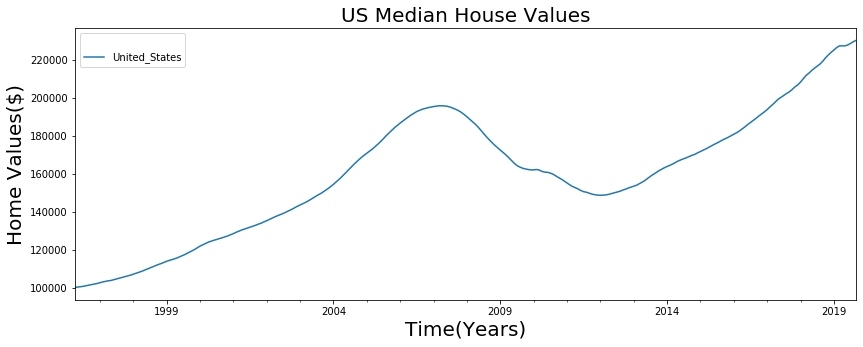

In [55]:
# Display the graphs showing the values

# home_values_all_homesVis.iplot(kind='line', fill=True, title= 'US Median House Values', 
#                                 xTitle='Time(Years)', yTitle='House Value($)')

home_values_all_homesVis.plot(figsize = (14,5))
plt.title('US Median House Values', size = 20)
plt.xlabel('Time(Years)', size = 20)
plt.ylabel('Home Values($)', size = 20)
plt.show()

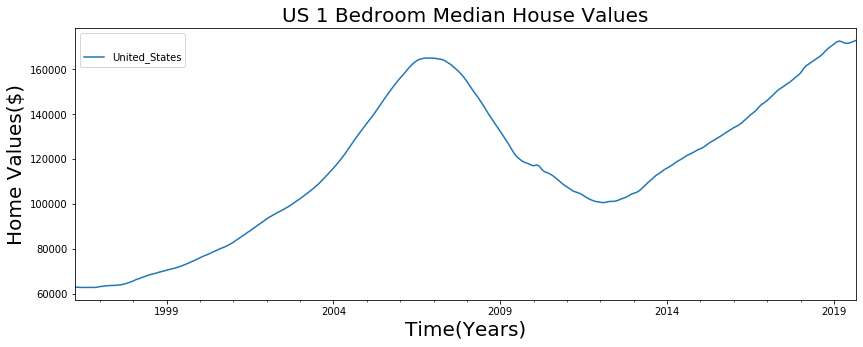

In [56]:
# home_value_1BedroomVis.iplot(kind='line', fill=True, title= 'US 1 Bedroom Median House Values', 
#                                 xTitle='Time(Years)', yTitle='House Value($)')

home_value_1BedroomVis.plot(figsize = (14,5))
plt.title('US 1 Bedroom Median House Values', size = 20)
plt.xlabel('Time(Years)', size = 20)
plt.ylabel('Home Values($)', size = 20)
plt.show()

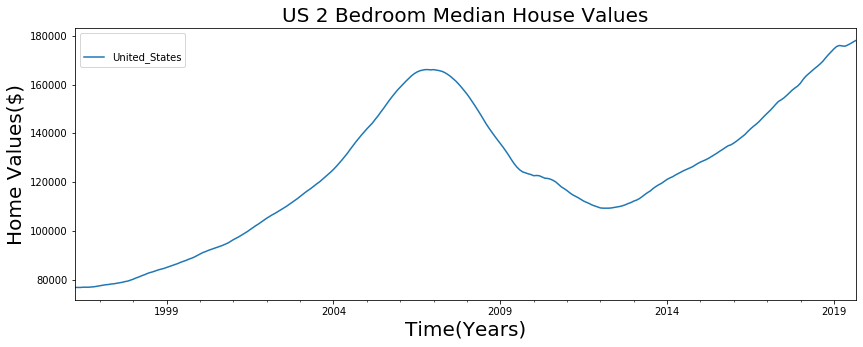

In [57]:
# home_value_2BedroomVis.iplot(kind='line', fill=True, title= 'US 2 Bedroom Median House Values', 
#                                 xTitle='Time(Years)', yTitle='House Value($)')

home_value_2BedroomVis.plot(figsize = (14,5))
plt.title('US 2 Bedroom Median House Values', size = 20)
plt.xlabel('Time(Years)', size = 20)
plt.ylabel('Home Values($)', size = 20)
plt.show()

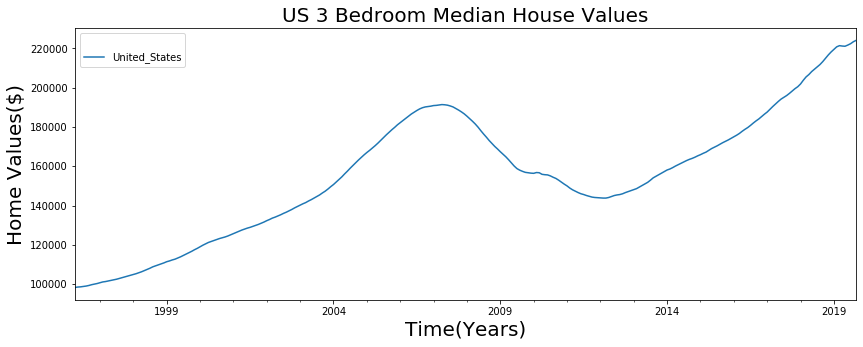

In [58]:
# home_value_3BedroomVis.iplot(kind='line', fill=True, title= 'US 3 Bedroom Median House Values', 
#                                 xTitle='Time(Years)', yTitle='House Value($)')

home_value_3BedroomVis.plot(figsize = (14,5))
plt.title('US 3 Bedroom Median House Values', size = 20)
plt.xlabel('Time(Years)', size = 20)
plt.ylabel('Home Values($)', size = 20)
plt.show()

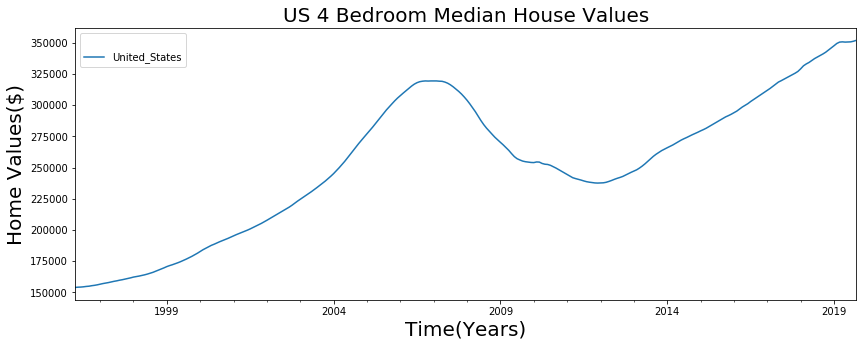

In [59]:
# home_value_4BedroomVis.iplot(kind='line', fill=True, title= 'US 4 Bedroom Median House Values', 
#                                 xTitle='Time(Years)', yTitle='House Value($)')

home_value_4BedroomVis.plot(figsize = (14,5))
plt.title('US 4 Bedroom Median House Values', size = 20)
plt.xlabel('Time(Years)', size = 20)
plt.ylabel('Home Values($)', size = 20)
plt.show()

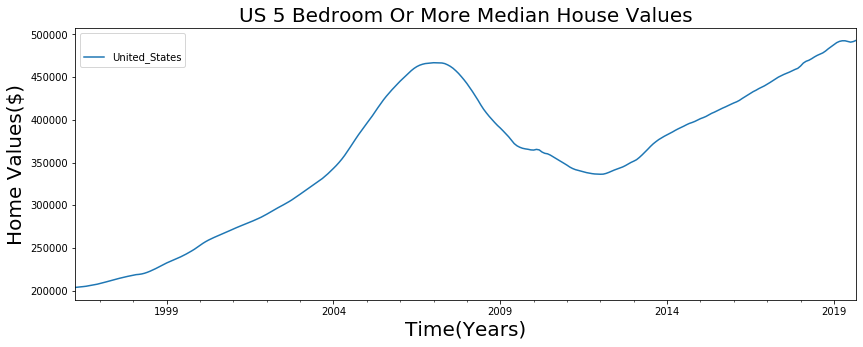

In [60]:
# home_value_5BedroomOrMoreVis.iplot(kind='line', fill=True, title= 'US 5 Bedroom Or More Median House Values', 
#                                 xTitle='Time(Years)', yTitle='House Value($)')

home_value_5BedroomOrMoreVis.plot(figsize = (14,5))
plt.title('US 5 Bedroom Or More Median House Values', size = 20)
plt.xlabel('Time(Years)', size = 20)
plt.ylabel('Home Values($)', size = 20)
plt.show()

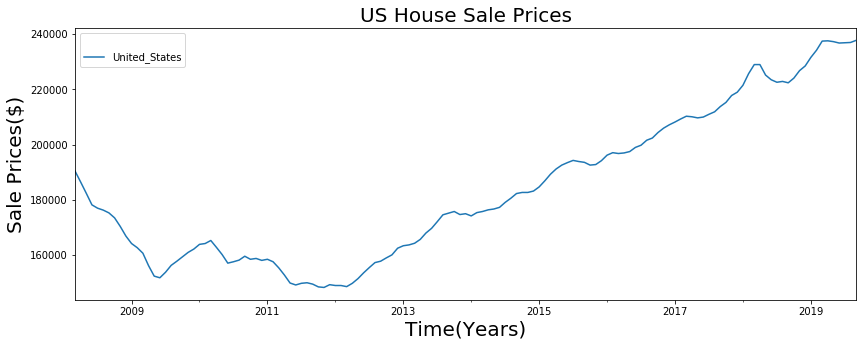

In [61]:
# sale_pricesVis.iplot(kind='line', fill=True, title= 'US Median House Prices', 
#                                 xTitle='Time(Years)', yTitle='House Prices($)')

sale_pricesVis.plot(figsize = (14,5))
plt.title('US House Sale Prices', size = 20)
plt.xlabel('Time(Years)', size = 20)
plt.ylabel('Sale Prices($)', size = 20)
plt.show()

### White Noise

In [62]:
white_noise_home_values = np.random.normal(loc = home_values_all_homes_T.United_States.mean(), scale = home_values_all_homes_T.United_States.std(),
                          size = len(home_values_all_homes_T))
home_values_all_homes_T['wn'] = white_noise_home_values
home_values_all_homes_T.describe()

,United_States,wn
count,282.000000,282.000000
mean,160277.304965,160203.452571
std,32918.542555,31397.172430
min,100200.000000,61415.323446
25%,136275.000000,138531.986629
50%,161650.000000,160323.735554
75%,184725.000000,179670.962527
max,230500.000000,259283.203688


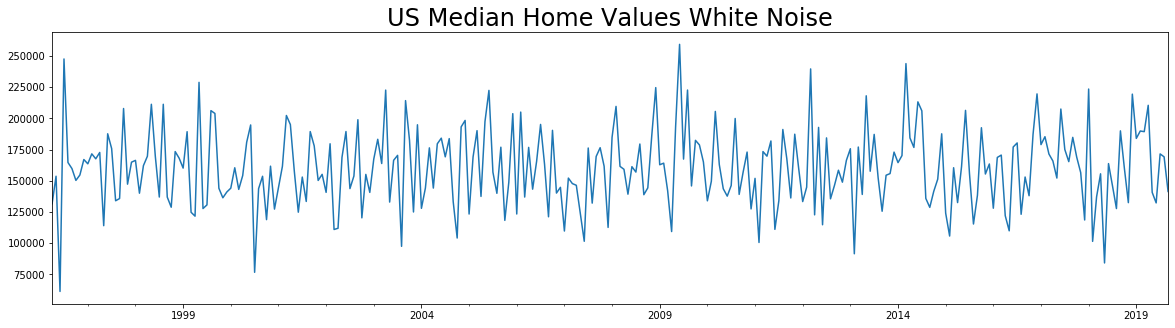

In [63]:
home_values_all_homes_T.wn.plot(figsize = (20,5))
plt.title('US Median Home Values White Noise', size = 24)
plt.show()

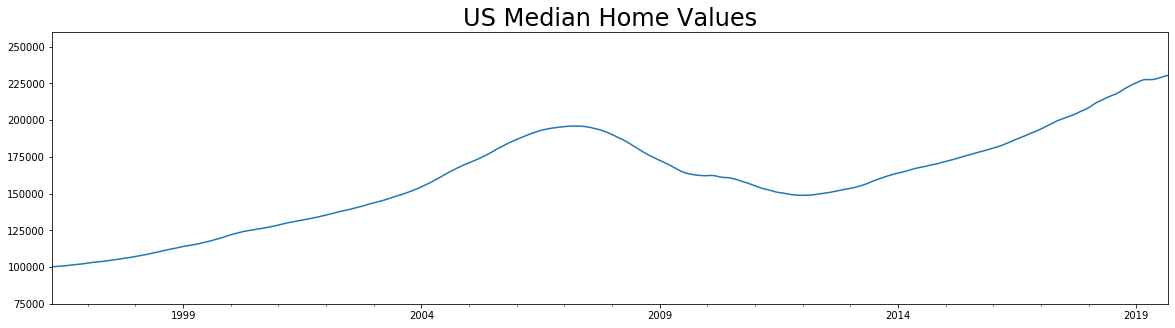

In [64]:
home_values_all_homes_T.United_States.plot(figsize=(20, 5))
plt.title('US Median Home Values', size = 24)
plt.ylim(75000, 260000)
plt.show()

In [65]:
white_noise_1Bedroom = np.random.normal(loc = home_value_1Bedroom_T.United_States.mean(), scale = home_value_1Bedroom_T.United_States.std(),
                          size = len(home_value_1Bedroom_T))
home_value_1Bedroom_T['wn'] = white_noise_1Bedroom
home_value_1Bedroom_T.describe()

,United_States,wn
count,282.000000,282.000000
mean,117075.177305,117365.375266
std,32605.160075,33449.522400
min,63000.000000,13651.913468
25%,94475.000000,95212.235484
50%,116900.000000,115903.524867
75%,144475.000000,139312.252352
max,172900.000000,218943.602979


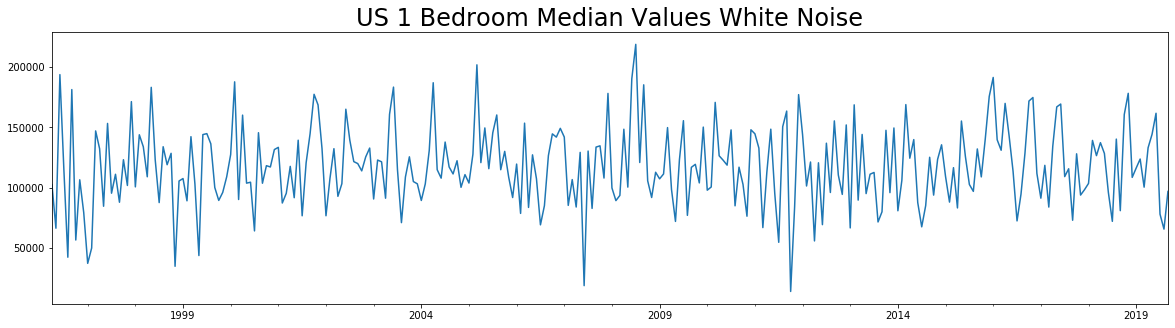

In [66]:
home_value_1Bedroom_T.wn.plot(figsize = (20,5))
plt.title('US 1 Bedroom Median Values White Noise', size = 24)
plt.show()

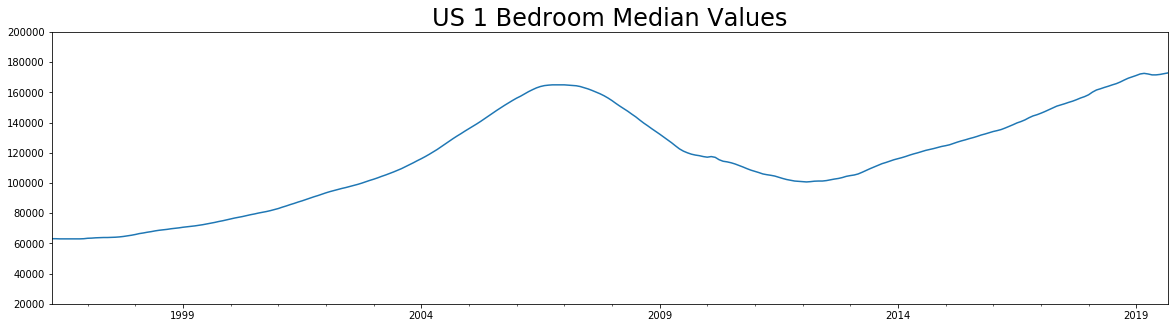

In [67]:
home_value_1Bedroom_T.United_States.plot(figsize=(20, 5))
plt.title('US 1 Bedroom Median Values', size = 24)
plt.ylim(20000, 200000)
plt.show()

In [68]:
white_noise_2Bedroom = np.random.normal(loc = home_value_2Bedroom_T.United_States.mean(), scale = home_value_2Bedroom_T.United_States.std(),
                          size = len(home_value_2Bedroom_T))
home_value_2Bedroom_T['wn'] = white_noise_2Bedroom
home_value_2Bedroom_T.describe()

,United_States,wn
count,282.000000,282.000000
mean,124308.510638,124628.634307
std,28254.777543,28180.349307
min,76800.000000,20270.898375
25%,106075.000000,106315.706833
50%,122650.000000,124454.753213
75%,147100.000000,143298.357039
max,178100.000000,222022.916247


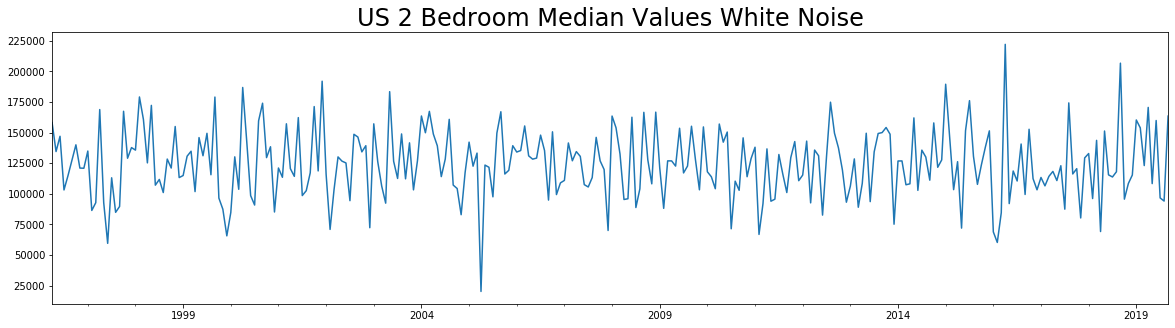

In [69]:
home_value_2Bedroom_T.wn.plot(figsize = (20,5))
plt.title('US 2 Bedroom Median Values White Noise', size = 24)
plt.show()

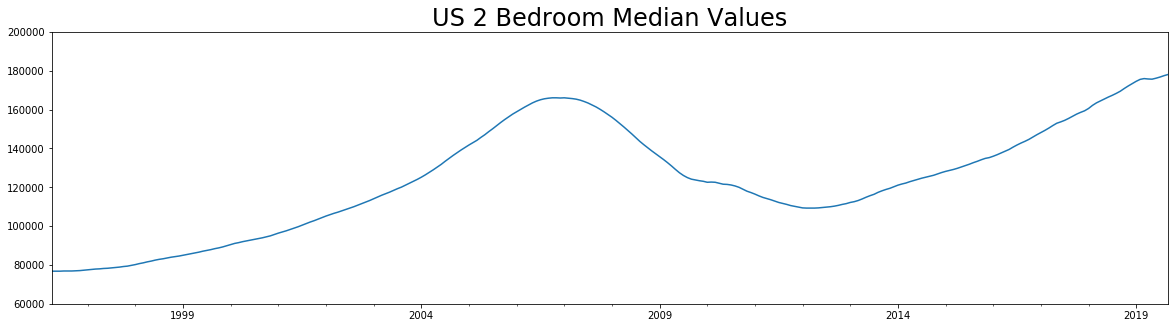

In [70]:
home_value_2Bedroom_T.United_States.plot(figsize=(20, 5))
plt.title('US 2 Bedroom Median Values', size = 24)
plt.ylim(60000, 200000)
plt.show()

In [71]:
white_noise_3Bedroom = np.random.normal(loc = home_value_3Bedroom_T.United_States.mean(), scale = home_value_3Bedroom_T.United_States.std(),
                          size = len(home_value_3Bedroom_T))
home_value_3Bedroom_T['wn'] = white_noise_3Bedroom
home_value_3Bedroom_T.describe()

,United_States,wn
count,282.000000,282.000000
mean,155722.695035,156740.513572
std,31745.355518,30718.744987
min,98300.000000,83562.659863
25%,133075.000000,137192.621000
50%,156250.000000,156355.529582
75%,179475.000000,177133.268185
max,224100.000000,244583.691148


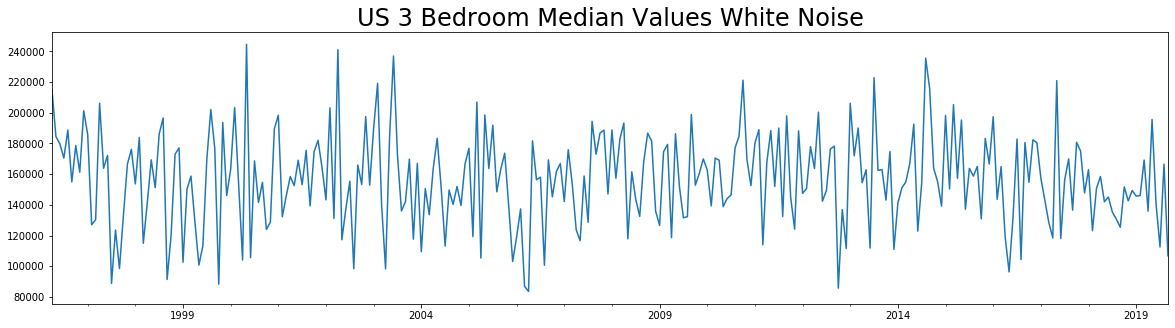

In [72]:
home_value_3Bedroom_T.wn.plot(figsize = (20,5))
plt.title('US 3 Bedroom Median Values White Noise', size = 24)
plt.show()

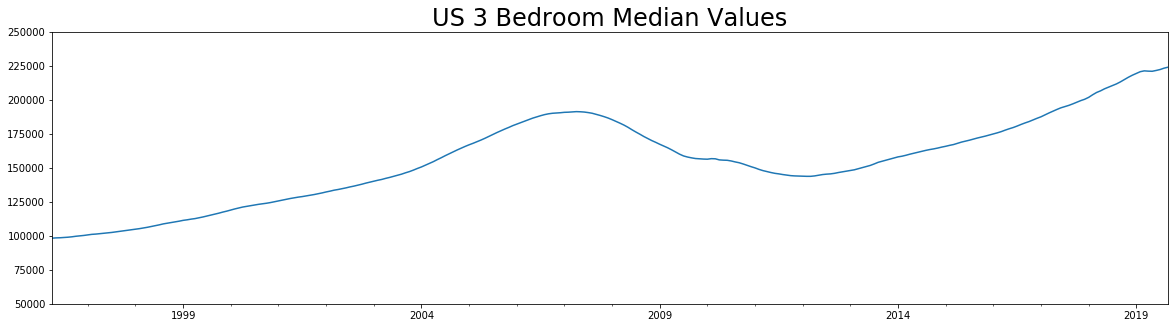

In [73]:
home_value_3Bedroom_T.United_States.plot(figsize=(20, 5))
plt.title('US 3 Bedroom Median Values', size = 24)
plt.ylim(50000, 250000)
plt.show()

In [74]:
white_noise_4Bedroom = np.random.normal(loc = home_value_4Bedroom_T.United_States.mean(), scale = home_value_4Bedroom_T.United_States.std(),
                          size = len(home_value_4Bedroom_T))
home_value_4Bedroom_T['wn'] = white_noise_4Bedroom
home_value_4Bedroom_T.describe()

,United_States,wn
count,282.000000,282.000000
mean,253318.085106,245635.369694
std,55636.167407,56748.200284
min,154000.000000,81036.781778
25%,209425.000000,207602.271589
50%,254850.000000,244206.214884
75%,298650.000000,283487.717653
max,351900.000000,463720.257823


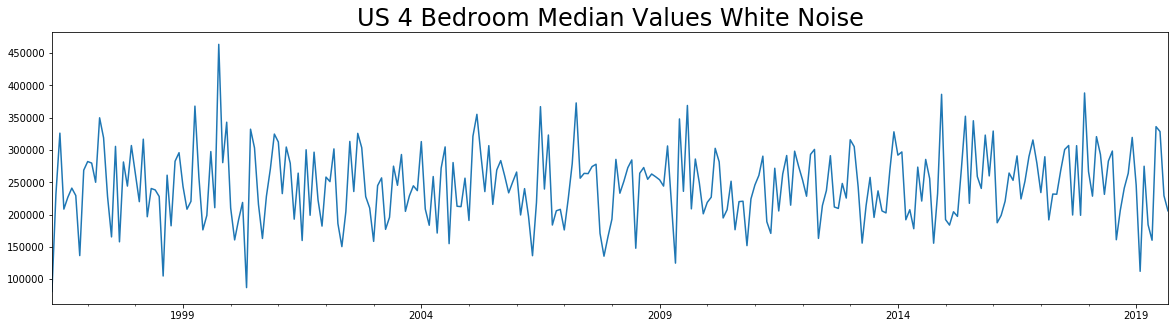

In [75]:
home_value_4Bedroom_T.wn.plot(figsize = (20,5))
plt.title('US 4 Bedroom Median Values White Noise', size = 24)
plt.show()

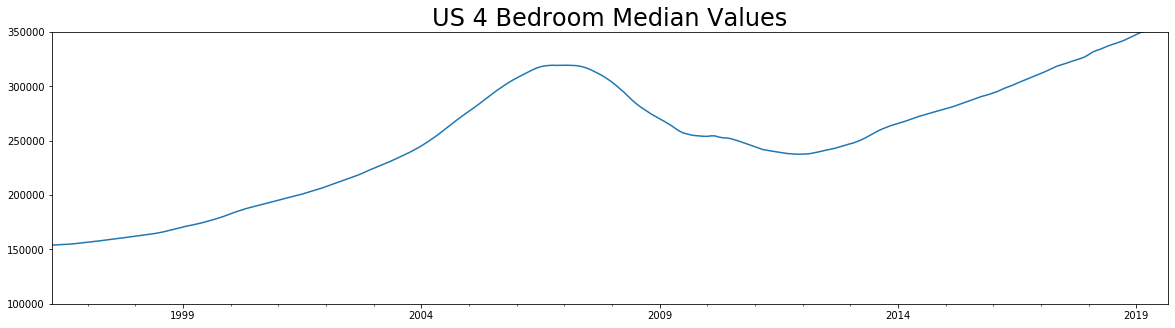

In [76]:
home_value_4Bedroom_T.United_States.plot(figsize=(20, 5))
plt.title('US 4 Bedroom Median Values', size = 24)
plt.ylim(100000, 350000)
plt.show()

In [77]:
white_noise_5BedroomOrMore = np.random.normal(loc = home_value_5BedroomOrMore_T.United_States.mean(), scale = home_value_5BedroomOrMore_T.United_States.std(),
                          size = len(home_value_5BedroomOrMore_T))
home_value_5BedroomOrMore_T['wn'] = white_noise_5BedroomOrMore
home_value_5BedroomOrMore_T.describe()

,United_States,wn
count,282.000000,282.000000
mean,358670.921986,354768.007635
std,84010.044764,85260.961177
min,203700.000000,159777.383019
25%,291875.000000,301986.718192
50%,365400.000000,352055.824539
75%,428700.000000,403472.421763
max,493100.000000,616986.138864


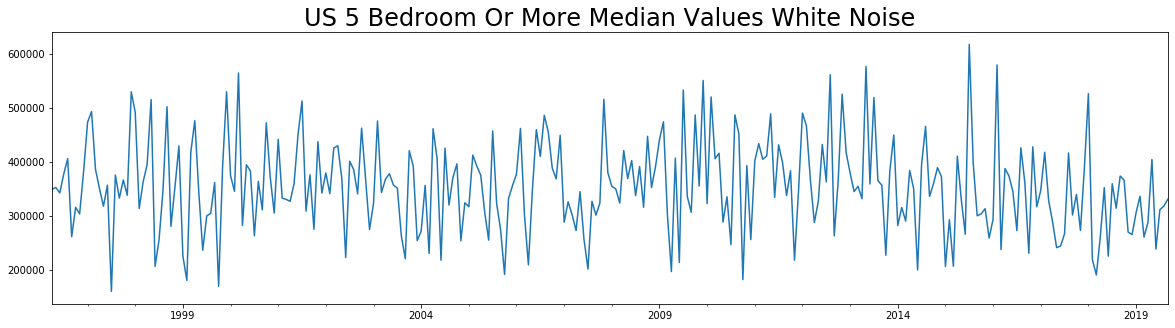

In [78]:
home_value_5BedroomOrMore_T.wn.plot(figsize = (20,5))
plt.title('US 5 Bedroom Or More Median Values White Noise', size = 24)
plt.show()

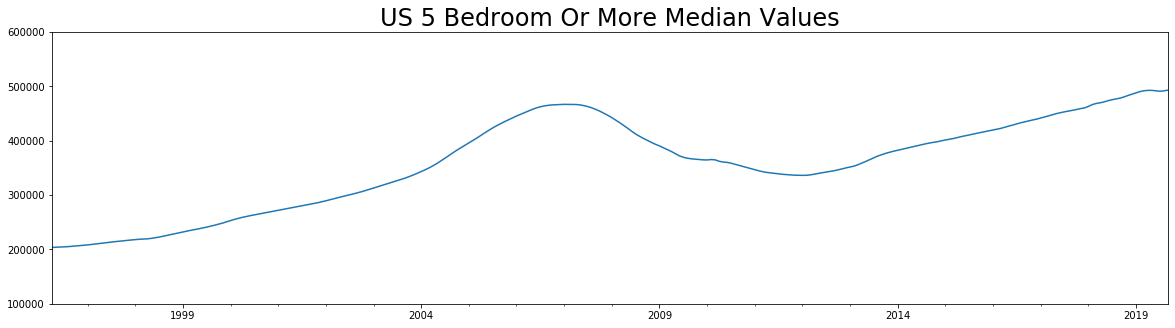

In [79]:
home_value_5BedroomOrMore_T.United_States.plot(figsize=(20, 5))
plt.title('US 5 Bedroom Or More Median Values', size = 24)
plt.ylim(100000, 600000)
plt.show()

In [80]:
white_noise_sale_prices = np.random.normal(loc = sale_prices_T.United_States.mean(), scale = sale_prices_T.United_States.std(),
                          size = len(sale_prices_T))
sale_prices_T['wn'] = white_noise_sale_prices
sale_prices_T.describe()

,United_States,wn
count,139.000000,139.000000
mean,183739.354604,182682.435267
std,27078.083680,27590.182636
min,148300.000000,101988.836115
25%,159500.000000,165741.526536
50%,176700.000000,185695.461564
75%,205200.000000,199962.019650
max,237770.290000,275939.399318


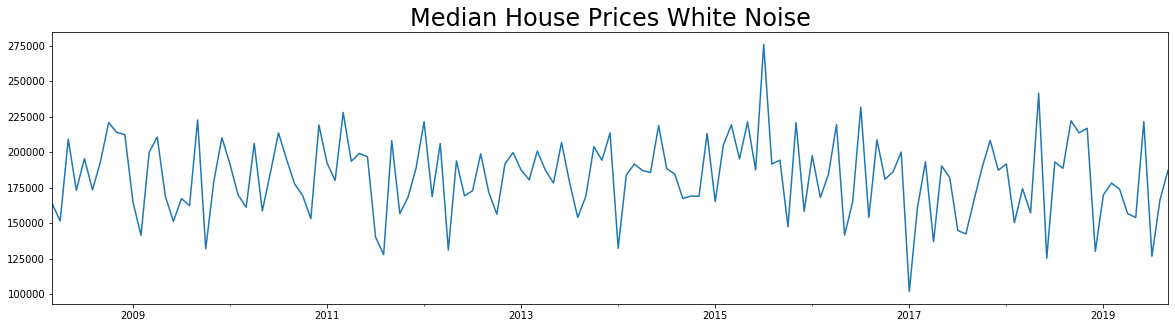

In [81]:
sale_prices_T.wn.plot(figsize = (20,5))
plt.title('Median House Prices White Noise', size = 24)
plt.show()

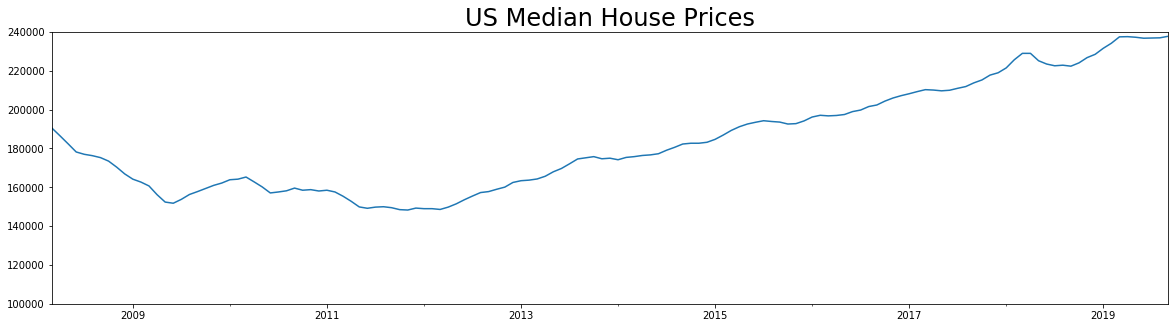

In [82]:
sale_prices_T.United_States.plot(figsize=(20, 5))
plt.title('US Median House Prices', size = 24)
plt.ylim(100000, 240000)
plt.show()

### Stationarity

Testing for stationarity for all homes Time Series

In [83]:
sts.adfuller(home_values_all_homes_T.United_States)

(-1.4642861225864552,
 0.5510987507173886,
 16,
 265,
 {'1%': -3.4552699038400827,
  '5%': -2.8725092359464526,
  '10%': -2.5726152830188678},
 3419.4143439993386)

In [84]:
sts.adfuller(home_values_all_homes_T.wn)

(-9.967166483513388,
 2.2907508416316315e-17,
 2,
 279,
 {'1%': -3.4540076534999957,
  '5%': -2.8719557347997178,
  '10%': -2.5723200648758366},
 6235.056667339984)

Testing for stationarity for 1 Bedroom Time Series

In [85]:
sts.adfuller(home_value_1Bedroom_T.United_States)

(-1.7696375767767363,
 0.39563653737053334,
 13,
 268,
 {'1%': -3.454988209954765,
  '5%': -2.8723857312734613,
  '10%': -2.572549407997327},
 3527.1341463202693)

In [86]:
sts.adfuller(home_value_1Bedroom_T.wn)

(-16.65068543115864,
 1.605039817252971e-29,
 0,
 281,
 {'1%': -3.4538376962008495,
  '5%': -2.8718811911083093,
  '10%': -2.5722803076202174},
 6257.737127928282)

Testing for stationarity for 2 Bedroom Time Series 

In [87]:
sts.adfuller(home_value_2Bedroom_T.United_States)

(-1.681588854925792,
 0.4406225429123669,
 12,
 269,
 {'1%': -3.4548957220044336,
  '5%': -2.8723451788613157,
  '10%': -2.572527778361272},
 3421.3867895571857)

In [88]:
sts.adfuller(home_value_2Bedroom_T.wn)

(-13.395140273699367,
 4.68338806607905e-25,
 1,
 280,
 {'1%': -3.453922368485787,
  '5%': -2.871918329081633,
  '10%': -2.5723001147959184},
 6182.840956956188)

Testing for stationarity for 3 Bedroom Time Series

In [89]:
sts.adfuller(home_value_3Bedroom_T.United_States)

(-1.5609748064001756,
 0.503161691707047,
 15,
 266,
 {'1%': -3.455175292841607,
  '5%': -2.8724677563219485,
  '10%': -2.57259315846006},
 3487.00351858963)

In [90]:
sts.adfuller(home_value_3Bedroom_T.wn)

(-17.60984368749475,
 3.8844577663512555e-30,
 0,
 281,
 {'1%': -3.4538376962008495,
  '5%': -2.8718811911083093,
  '10%': -2.5722803076202174},
 6226.288606724946)

Testing for stationarity for 4 Bedroom Time Series

In [91]:
sts.adfuller(home_value_4Bedroom_T.United_States)

(-1.312927990612801,
 0.6232371834771104,
 13,
 268,
 {'1%': -3.454988209954765,
  '5%': -2.8723857312734613,
  '10%': -2.572549407997327},
 3566.2795038279664)

In [92]:
sts.adfuller(home_value_4Bedroom_T.wn)

(-9.996148532125295,
 1.9378982615790786e-17,
 3,
 278,
 {'1%': -3.4540935579190495,
  '5%': -2.8719934111688965,
  '10%': -2.5723401594120388},
 6547.587003759858)

Testing for stationarity for 5 Or More Bedroom Time Series

In [93]:
sts.adfuller(home_value_5BedroomOrMore_T.United_States)

(-1.3568844935278506,
 0.6027629531615687,
 12,
 269,
 {'1%': -3.4548957220044336,
  '5%': -2.8723451788613157,
  '10%': -2.572527778361272},
 3795.267791999897)

In [94]:
sts.adfuller(home_value_5BedroomOrMore_T.wn)

(-16.689786207932652,
 1.491880050157051e-29,
 0,
 281,
 {'1%': -3.4538376962008495,
  '5%': -2.8718811911083093,
  '10%': -2.5722803076202174},
 6776.849500615259)

Testing for stationarity for House Prices Time Series

In [95]:
sts.adfuller(sale_prices_T.United_States)

(0.8350538862754755,
 0.992181441430482,
 12,
 126,
 {'1%': -3.4833462346078936,
  '5%': -2.8847655969877666,
  '10%': -2.5791564575459813},
 2032.086618981452)

In [96]:
sts.adfuller(sale_prices_T.wn)

(-13.013243539710041,
 2.541972412619775e-24,
 0,
 138,
 {'1%': -3.47864788917503,
  '5%': -2.882721765644168,
  '10%': -2.578065326612056},
 2891.609742487446)

### Seasonality

#### Naive Decomposition

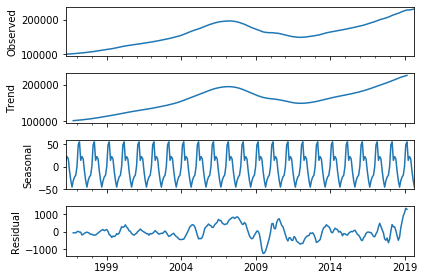

In [97]:
s_dec_home_values_add = seasonal_decompose(home_values_all_homes_T.United_States, model='additive')
s_dec_home_values_add.plot()
plt.show()

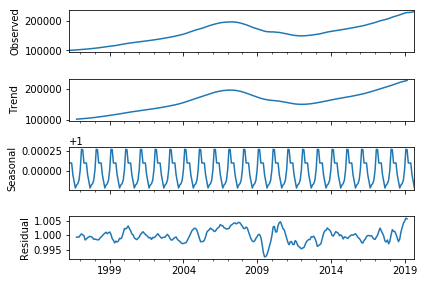

In [98]:
s_dec_home_values_mul = seasonal_decompose(home_values_all_homes_T.United_States, model='multiplicative')
s_dec_home_values_mul.plot()
plt.show()

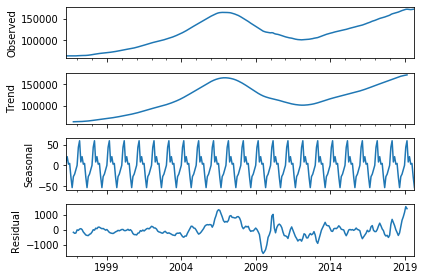

In [99]:
s_dec_1Bedroom_add = seasonal_decompose(home_value_1Bedroom_T.United_States, model='additive')
s_dec_1Bedroom_add.plot()
plt.show()

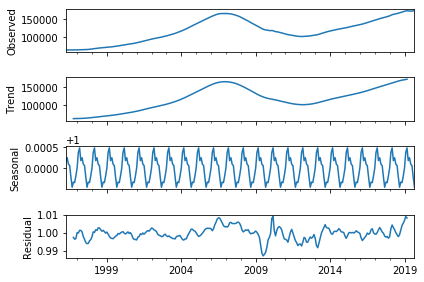

In [100]:
s_dec_1Bedroom_mul = seasonal_decompose(home_value_1Bedroom_T.United_States, model='multiplicative')
s_dec_1Bedroom_mul.plot()
plt.show()

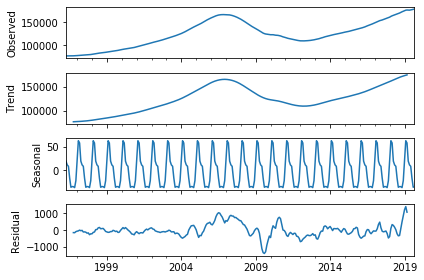

In [101]:
s_dec_2Bedroom_add = seasonal_decompose(home_value_2Bedroom_T.United_States, model='additive')
s_dec_2Bedroom_add.plot()
plt.show()

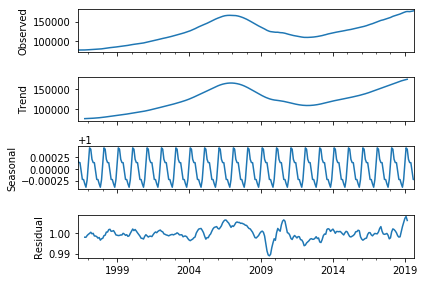

In [102]:
s_dec_2Bedroom_mul = seasonal_decompose(home_value_2Bedroom_T.United_States, model='multiplicative')
s_dec_2Bedroom_mul.plot()
plt.show()

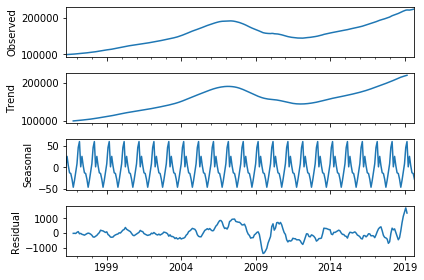

In [103]:
s_dec_3Bedroom_add = seasonal_decompose(home_value_3Bedroom_T.United_States, model='additive')
s_dec_3Bedroom_add.plot()
plt.show()

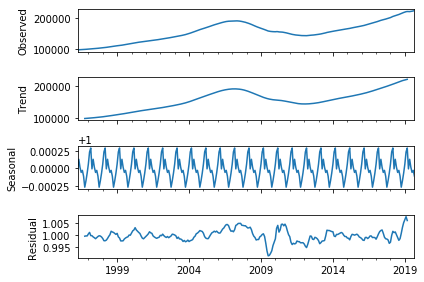

In [104]:
s_dec_3Bedroom_mul = seasonal_decompose(home_value_3Bedroom_T.United_States, model='multiplicative')
s_dec_3Bedroom_mul.plot()
plt.show()

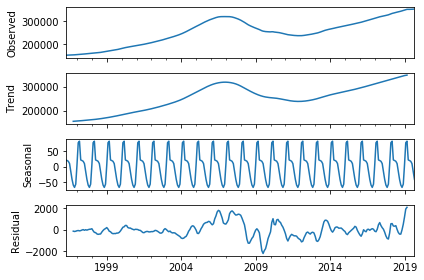

In [105]:
s_dec_4Bedroom_add = seasonal_decompose(home_value_4Bedroom_T.United_States, model='additive')
s_dec_4Bedroom_add.plot()
plt.show()

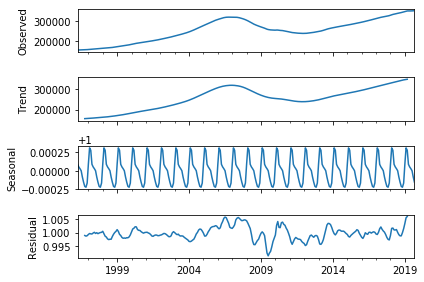

In [106]:
s_dec_4Bedroom_mul = seasonal_decompose(home_value_4Bedroom_T.United_States, model='multiplicative')
s_dec_4Bedroom_mul.plot()
plt.show()

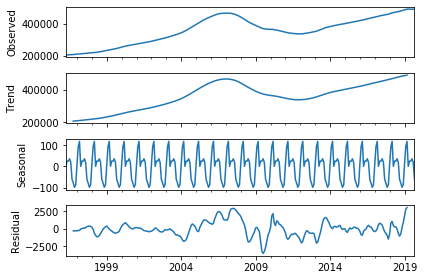

In [107]:
s_dec_5BedroomOrMore_add = seasonal_decompose(home_value_5BedroomOrMore_T.United_States, model='additive')
s_dec_5BedroomOrMore_add.plot()
plt.show()

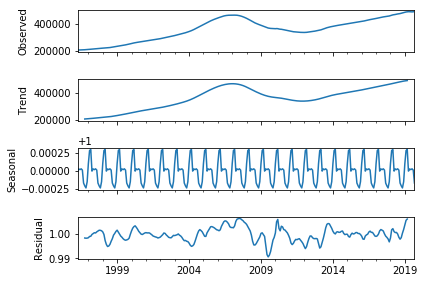

In [108]:
s_dec_5BedroomOrMore_mul = seasonal_decompose(home_value_5BedroomOrMore_T.United_States, model='multiplicative')
s_dec_5BedroomOrMore_mul.plot()
plt.show()

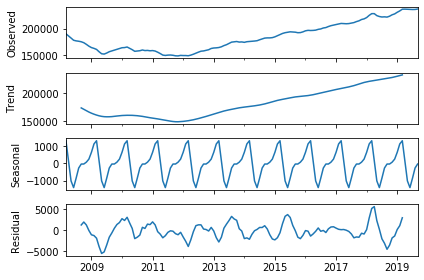

In [109]:
s_dec_sale_prices_add = seasonal_decompose(sale_prices_T.United_States, model='additive')
s_dec_sale_prices_add.plot()
plt.show()

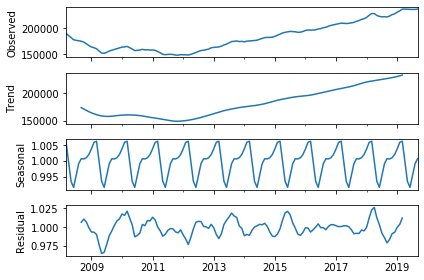

In [110]:
s_dec_sale_prices_mul = seasonal_decompose(sale_prices_T.United_States, model='multiplicative')
s_dec_sale_prices_mul.plot()
plt.show()

### Autocorrelation

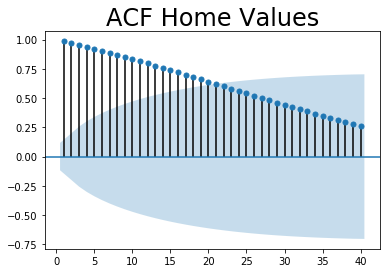

In [111]:
sgt.plot_acf(home_values_all_homes_T.United_States, lags = 40, zero = False)
plt.title('ACF Home Values', size = 24)
plt.show()

Autocorrelation for white noise

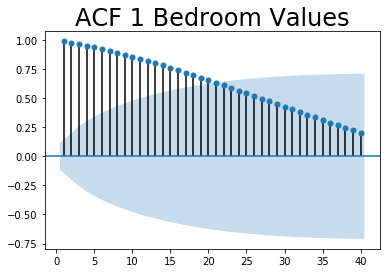

In [112]:
sgt.plot_acf(home_value_1Bedroom_T.United_States, lags = 40, zero = False)
plt.title('ACF 1 Bedroom Values', size = 24)
plt.show()

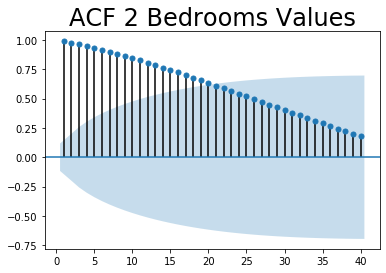

In [113]:
sgt.plot_acf(home_value_2Bedroom_T.United_States, lags = 40, zero = False)
plt.title('ACF 2 Bedrooms Values', size = 24)
plt.show()

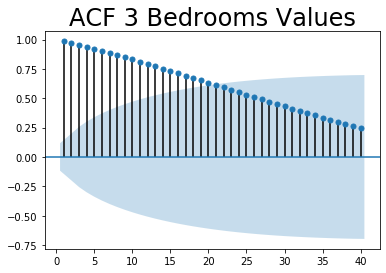

In [114]:
sgt.plot_acf(home_value_3Bedroom_T.United_States, lags = 40, zero = False)
plt.title('ACF 3 Bedrooms Values', size = 24)
plt.show()

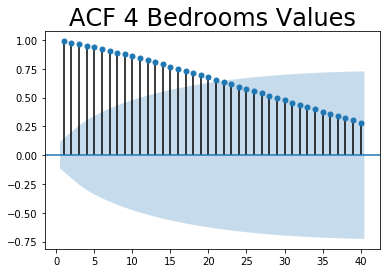

In [115]:
sgt.plot_acf(home_value_4Bedroom_T.United_States, lags = 40, zero = False)
plt.title('ACF 4 Bedrooms Values', size = 24)
plt.show()

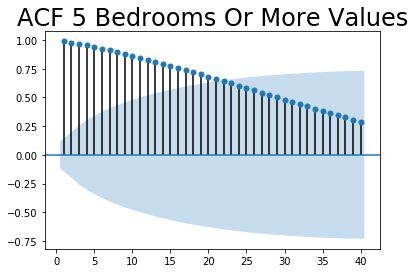

In [116]:
sgt.plot_acf(home_value_5BedroomOrMore_T.United_States, lags = 40, zero = False)
plt.title('ACF 5 Bedrooms Or More Values', size = 24)
plt.show()

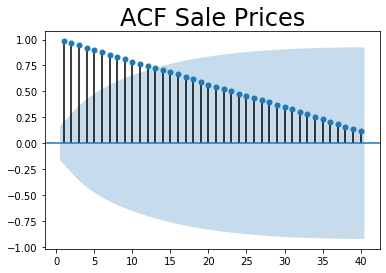

In [117]:
sgt.plot_acf(sale_prices_T.United_States, lags = 40, zero = False)
plt.title('ACF Sale Prices', size = 24)
plt.show()

### Partial AutoCorrelation Function

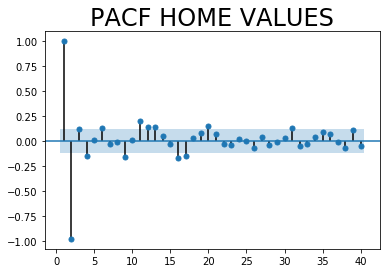

In [118]:
sgt.plot_pacf(home_values_all_homes_T.United_States, lags = 40, zero = False, method = ('ols'))
plt.title('PACF HOME VALUES', size = 24)
plt.show()

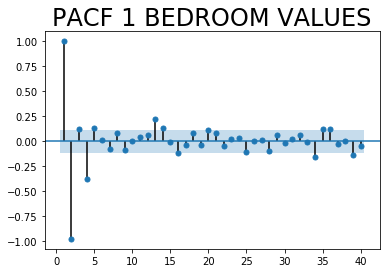

In [119]:
sgt.plot_pacf(home_value_1Bedroom_T.United_States, lags = 40, zero = False, method = ('ols'))
plt.title('PACF 1 BEDROOM VALUES', size = 24)
plt.show()

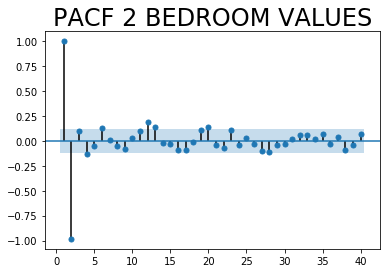

In [120]:
sgt.plot_pacf(home_value_2Bedroom_T.United_States, lags = 40, zero = False, method = ('ols'))
plt.title('PACF 2 BEDROOM VALUES', size = 24)
plt.show()

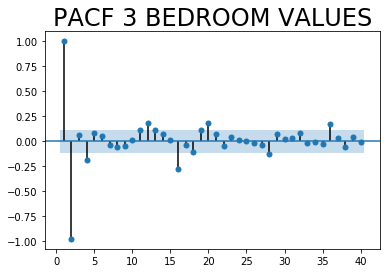

In [121]:
sgt.plot_pacf(home_value_3Bedroom_T.United_States, lags = 40, zero = False, method = ('ols'))
plt.title('PACF 3 BEDROOM VALUES', size = 24)
plt.show()

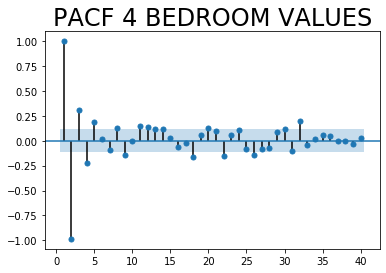

In [122]:
sgt.plot_pacf(home_value_4Bedroom_T.United_States, lags = 40, zero = False, method = ('ols'))
plt.title('PACF 4 BEDROOM VALUES', size = 24)
plt.show()

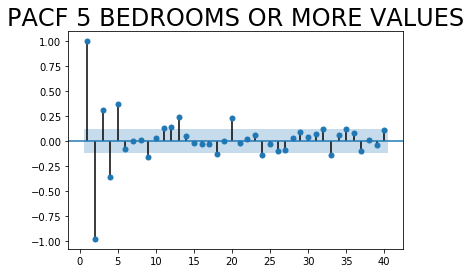

In [123]:
sgt.plot_pacf(home_value_5BedroomOrMore_T.United_States, lags = 40, zero = False, method = ('ols'))
plt.title('PACF 5 BEDROOMS OR MORE VALUES', size = 24)
plt.show()

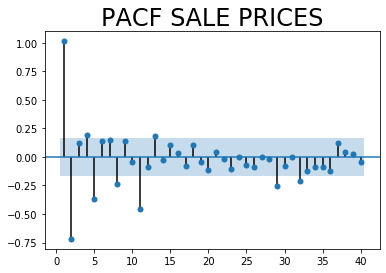

In [124]:
sgt.plot_pacf(sale_prices_T.United_States, lags = 40, zero = False, method = ('ols'))
plt.title('PACF SALE PRICES', size = 24)
plt.show()

## MODELS

## ARIMA MODEL

## ARIMA(1,1,1)

In [125]:
import warnings
warnings.filterwarnings("ignore")

In [126]:
model_arima_homes = ARIMA(home_values_all_homes_T.United_States, order=(1,1,1))
results_arima_homes = model_arima_homes.fit()
results_arima_homes.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.United_States   No. Observations:                  281
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1813.419
Method:                       css-mle   S.D. of innovations            152.762
Date:                Sun, 26 Jan 2020   AIC                           3634.838
Time:                        05:01:31   BIC                           3649.391
Sample:                    05-01-1996   HQIC                          3640.674
                         - 09-01-2019                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   457.6091    316.404      1.446      0.149    -162.530    1077.749
ar.L1.D.United_States     0.9692      0.014     70.761      0.000       0.942       0.996
ma.L1.D.United_States     0.1826      0.066      2.762      0.006       0.053       0.312
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0317           +0.0000j            1.0317            0.0000
MA.1           -5.4757           +0.0000j            5.4757            0.5000
-----------------------------------------------------------------------------
"""

In [127]:
model_arima_1B = ARIMA(home_value_1Bedroom_T.United_States, order=(1,1,1))
results_arima_1B = model_arima_1B.fit()
results_arima_1B.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.United_States   No. Observations:                  281
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1883.951
Method:                       css-mle   S.D. of innovations            196.339
Date:                Sun, 26 Jan 2020   AIC                           3775.902
Time:                        05:01:31   BIC                           3790.455
Sample:                    05-01-1996   HQIC                          3781.739
                         - 09-01-2019                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   373.8414    321.196      1.164      0.245    -255.690    1003.373
ar.L1.D.United_States     0.9524      0.018     54.059      0.000       0.918       0.987
ma.L1.D.United_States     0.3966      0.070      5.680      0.000       0.260       0.533
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0500           +0.0000j            1.0500            0.0000
MA.1           -2.5214           +0.0000j            2.5214            0.5000
-----------------------------------------------------------------------------
"""

In [128]:
model_arima_2B = ARIMA(home_value_2Bedroom_T.United_States, order=(1,1,1))
results_arima_2B = model_arima_2B.fit()
results_arima_2B.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.United_States   No. Observations:                  281
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1811.793
Method:                       css-mle   S.D. of innovations            151.852
Date:                Sun, 26 Jan 2020   AIC                           3631.587
Time:                        05:01:31   BIC                           3646.140
Sample:                    05-01-1996   HQIC                          3637.424
                         - 09-01-2019                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   345.7016    356.588      0.969      0.333    -353.198    1044.601
ar.L1.D.United_States     0.9740      0.012     78.671      0.000       0.950       0.998
ma.L1.D.United_States     0.1521      0.064      2.390      0.018       0.027       0.277
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0267           +0.0000j            1.0267            0.0000
MA.1           -6.5730           +0.0000j            6.5730            0.5000
-----------------------------------------------------------------------------
"""

In [129]:
model_arima_3B = ARIMA(home_value_3Bedroom_T.United_States, order=(1,1,1))
results_arima_3B = model_arima_3B.fit()
results_arima_3B.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.United_States   No. Observations:                  281
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1849.037
Method:                       css-mle   S.D. of innovations            173.484
Date:                Sun, 26 Jan 2020   AIC                           3706.075
Time:                        05:01:32   BIC                           3720.628
Sample:                    05-01-1996   HQIC                          3711.911
                         - 09-01-2019                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   446.9930    304.319      1.469      0.143    -149.462    1043.448
ar.L1.D.United_States     0.9654      0.015     64.637      0.000       0.936       0.995
ma.L1.D.United_States     0.1140      0.077      1.472      0.142      -0.038       0.266
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0358           +0.0000j            1.0358            0.0000
MA.1           -8.7707           +0.0000j            8.7707            0.5000
-----------------------------------------------------------------------------
"""

In [130]:
model_arima_4B = ARIMA(home_value_4Bedroom_T.United_States, order=(1,1,1))
results_arima_4B = model_arima_4B.fit()
results_arima_4B.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.United_States   No. Observations:                  281
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1893.006
Method:                       css-mle   S.D. of innovations            202.527
Date:                Sun, 26 Jan 2020   AIC                           3794.013
Time:                        05:01:32   BIC                           3808.566
Sample:                    05-01-1996   HQIC                          3799.850
                         - 09-01-2019                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   660.7844    562.723      1.174      0.241    -442.133    1763.702
ar.L1.D.United_States     0.9721      0.013     76.646      0.000       0.947       0.997
ma.L1.D.United_States     0.4522      0.052      8.687      0.000       0.350       0.554
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0287           +0.0000j            1.0287            0.0000
MA.1           -2.2117           +0.0000j            2.2117            0.5000
-----------------------------------------------------------------------------
"""

In [131]:
model_arima_5B = ARIMA(home_value_5BedroomOrMore_T.United_States, order=(1,1,1))
results_arima_5B = model_arima_5B.fit()
results_arima_5B.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.United_States   No. Observations:                  281
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2025.502
Method:                       css-mle   S.D. of innovations            324.357
Date:                Sun, 26 Jan 2020   AIC                           4059.003
Time:                        05:01:32   BIC                           4073.557
Sample:                    05-01-1996   HQIC                          4064.840
                         - 09-01-2019                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1020.2216    796.543      1.281      0.201    -540.975    2581.418
ar.L1.D.United_States     0.9631      0.015     64.794      0.000       0.934       0.992
ma.L1.D.United_States     0.6542      0.043     15.088      0.000       0.569       0.739
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0383           +0.0000j            1.0383            0.0000
MA.1           -1.5285           +0.0000j            1.5285            0.5000
-----------------------------------------------------------------------------
"""

In [132]:
model_arima_sales = ARIMA(sale_prices_T.United_States, order=(1,1,1))
results_arima_sales = model_arima_sales.fit()
results_arima_sales.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.United_States   No. Observations:                  138
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1168.280
Method:                       css-mle   S.D. of innovations           1145.750
Date:                Sun, 26 Jan 2020   AIC                           2344.560
Time:                        05:01:32   BIC                           2356.269
Sample:                    04-01-2008   HQIC                          2349.318
                         - 09-01-2019                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   275.6828    361.454      0.763      0.447    -432.755     984.120
ar.L1.D.United_States     0.7088      0.074      9.517      0.000       0.563       0.855
ma.L1.D.United_States     0.0967      0.086      1.130      0.261      -0.071       0.264
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4108           +0.0000j            1.4108            0.0000
MA.1          -10.3419           +0.0000j           10.3419            0.5000
-----------------------------------------------------------------------------
"""

## Residuals of the ARIMA(1,1,1)

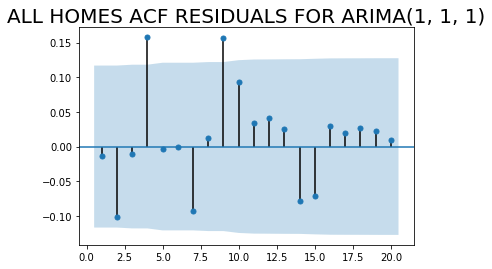

In [133]:
home_values_all_homes_T['res_arima1'] = results_arima_homes.resid
sgt.plot_acf(home_values_all_homes_T.res_arima1[1:], zero = False, lags = 20)
plt.title('ALL HOMES ACF RESIDUALS FOR ARIMA(1, 1, 1)', size = 20)
plt.show()

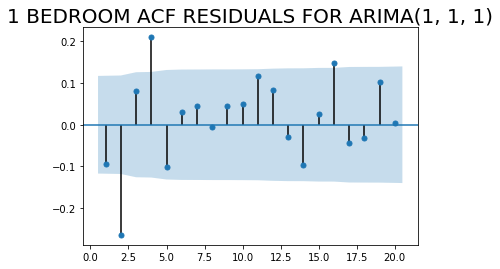

In [134]:
home_value_1Bedroom_T['res_arima1'] = results_arima_1B.resid
sgt.plot_acf(home_value_1Bedroom_T.res_arima1[1:], zero = False, lags = 20)
plt.title('1 BEDROOM ACF RESIDUALS FOR ARIMA(1, 1, 1)', size = 20)
plt.show()

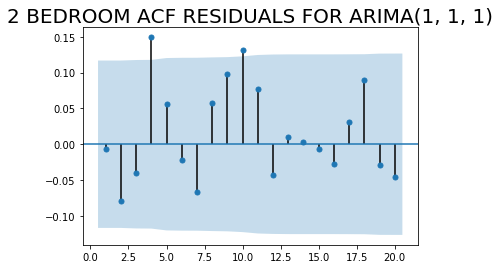

In [135]:
home_value_2Bedroom_T['res_arima1'] = results_arima_2B.resid
sgt.plot_acf(home_value_2Bedroom_T.res_arima1[1:], zero = False, lags = 20)
plt.title('2 BEDROOM ACF RESIDUALS FOR ARIMA(1, 1, 1)', size = 20)
plt.show()

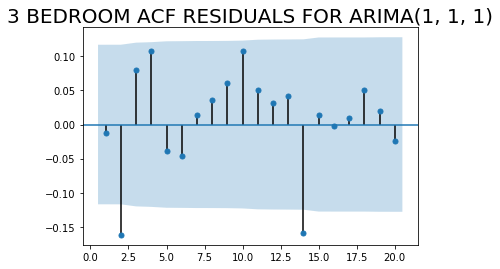

In [136]:
home_value_3Bedroom_T['res_arima1'] = results_arima_3B.resid
sgt.plot_acf(home_value_3Bedroom_T.res_arima1[1:], zero = False, lags = 20)
plt.title('3 BEDROOM ACF RESIDUALS FOR ARIMA(1, 1, 1)', size = 20)
plt.show()

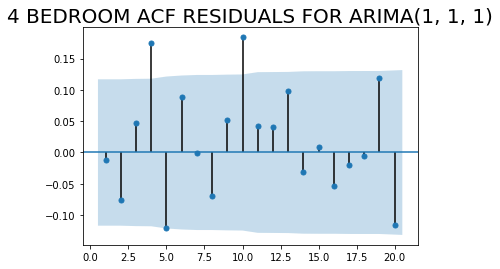

In [137]:
home_value_4Bedroom_T['res_arima1'] = results_arima_4B.resid
sgt.plot_acf(home_value_4Bedroom_T.res_arima1[1:], zero = False, lags = 20)
plt.title('4 BEDROOM ACF RESIDUALS FOR ARIMA(1, 1, 1)', size = 20)
plt.show()

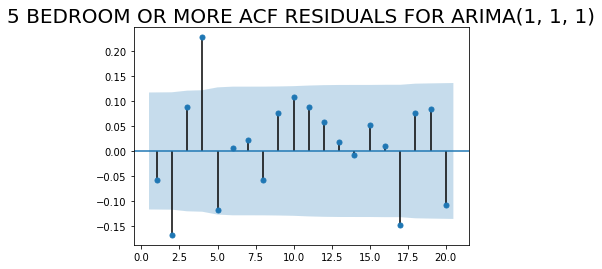

In [138]:
home_value_5BedroomOrMore_T['res_arima1'] = results_arima_5B.resid
sgt.plot_acf(home_value_5BedroomOrMore_T.res_arima1[1:], zero = False, lags = 20)
plt.title('5 BEDROOM OR MORE ACF RESIDUALS FOR ARIMA(1, 1, 1)', size = 20)
plt.show()

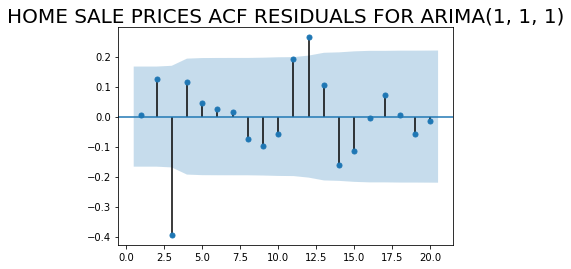

In [139]:
sale_prices_T['res_arima1'] = results_arima_sales.resid
sgt.plot_acf(sale_prices_T.res_arima1[1:], zero = False, lags = 20)
plt.title('HOME SALE PRICES ACF RESIDUALS FOR ARIMA(1, 1, 1)', size = 20)
plt.show()

## HIGHER-LAG ARIMA MODELS

In [140]:
model_arima_homes = ARIMA(home_values_all_homes_T.United_States, order=(6,1,4))
results_arima_homes = model_arima_homes.fit()
results_arima_homes.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.United_States   No. Observations:                  281
Model:                 ARIMA(6, 1, 4)   Log Likelihood               -1797.115
Method:                       css-mle   S.D. of innovations            141.491
Date:                Sun, 26 Jan 2020   AIC                           3618.229
Time:                        05:01:39   BIC                           3661.890
Sample:                    05-01-1996   HQIC                          3635.740
                         - 09-01-2019                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   847.0395    722.508      1.172      0.242    -569.050    2263.129
ar.L1.D.United_States     0.3625      0.060      6.006      0.000       0.244       0.481
ar.L2.D.United_States     0.3416      0.047      7.236      0.000       0.249       0.434
ar.L3.D.United_States    -0.4124      0.053     -7.796      0.000      -0.516      -0.309
ar.L4.D.United_States    -0.0221      0.053     -0.417      0.677      -0.126       0.082
ar.L5.D.United_States     0.8562      0.046     18.658      0.000       0.766       0.946
ar.L6.D.United_States    -0.1957      0.062     -3.151      0.002      -0.317      -0.074
ma.L1.D.United_States     0.7392      0.036     20.364      0.000       0.668       0.810
ma.L2.D.United_States     0.2657      0.021     12.553      0.000       0.224       0.307
ma.L3.D.United_States     0.7393      0.028     26.762      0.000       0.685       0.793
ma.L4.D.United_States     0.9999      0.042     23.692      0.000       0.917       1.083
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9035           -0.5109j            1.0379           -0.4181
AR.2           -0.9035           +0.5109j            1.0379            0.4181
AR.3            0.4507           -0.9409j            1.0433           -0.1789
AR.4            0.4507           +0.9409j            1.0433            0.1789
AR.5            1.0238           -0.0000j            1.0238           -0.0000
AR.6            4.2571           -0.0000j            4.2571           -0.0000
MA.1            0.4991           -0.8666j            1.0000           -0.1668
MA.2            0.4991           +0.8666j            1.0000            0.1668
MA.3           -0.8688           -0.4953j            1.0001           -0.4175
MA.4           -0.8688           +0.4953j            1.0001            0.4175
-----------------------------------------------------------------------------
"""

In [141]:
model_arima_homes = ARIMA(home_value_1Bedroom_T.United_States, order=(2,1,1))
results_arima_homes = model_arima_homes.fit()
results_arima_homes.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.United_States   No. Observations:                  281
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1879.230
Method:                       css-mle   S.D. of innovations            193.063
Date:                Sun, 26 Jan 2020   AIC                           3768.460
Time:                        05:01:39   BIC                           3786.652
Sample:                    05-01-1996   HQIC                          3775.756
                         - 09-01-2019                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   368.7641    354.728      1.040      0.299    -326.490    1064.018
ar.L1.D.United_States     0.6414      0.105      6.113      0.000       0.436       0.847
ar.L2.D.United_States     0.3100      0.104      2.993      0.003       0.107       0.513
ma.L1.D.United_States     0.6306      0.079      7.966      0.000       0.475       0.786
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0382           +0.0000j            1.0382            0.0000
AR.2           -3.1067           +0.0000j            3.1067            0.5000
MA.1           -1.5857           +0.0000j            1.5857            0.5000
-----------------------------------------------------------------------------
"""

In [142]:
model_arima_homes = ARIMA(home_value_2Bedroom_T.United_States, order=(1,1,2))
results_arima_homes = model_arima_homes.fit()
results_arima_homes.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.United_States   No. Observations:                  281
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1811.209
Method:                       css-mle   S.D. of innovations            151.539
Date:                Sun, 26 Jan 2020   AIC                           3632.419
Time:                        05:01:39   BIC                           3650.610
Sample:                    05-01-1996   HQIC                          3639.715
                         - 09-01-2019                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   345.4665    372.650      0.927      0.355    -384.913    1075.846
ar.L1.D.United_States     0.9773      0.012     83.491      0.000       0.954       1.000
ma.L1.D.United_States     0.1292      0.062      2.090      0.038       0.008       0.250
ma.L2.D.United_States    -0.0609      0.056     -1.091      0.276      -0.170       0.049
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0232           +0.0000j            1.0232            0.0000
MA.1           -3.1272           +0.0000j            3.1272            0.5000
MA.2            5.2483           +0.0000j            5.2483            0.0000
-----------------------------------------------------------------------------
"""

In [143]:
model_arima_homes = ARIMA(home_value_3Bedroom_T.United_States, order=(2,1,3))
results_arima_homes = model_arima_homes.fit()
results_arima_homes.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.United_States   No. Observations:                  281
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1845.230
Method:                       css-mle   S.D. of innovations            171.134
Date:                Sun, 26 Jan 2020   AIC                           3704.460
Time:                        05:01:40   BIC                           3729.928
Sample:                    05-01-1996   HQIC                          3714.674
                         - 09-01-2019                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   443.5933    340.271      1.304      0.193    -223.325    1110.512
ar.L1.D.United_States     0.3074      0.485      0.633      0.527      -0.644       1.259
ar.L2.D.United_States     0.6512      0.473      1.377      0.170      -0.276       1.578
ma.L1.D.United_States     0.7712      0.486      1.588      0.113      -0.181       1.723
ma.L2.D.United_States    -0.0897      0.088     -1.024      0.307      -0.262       0.082
ma.L3.D.United_States    -0.1196      0.094     -1.273      0.204      -0.304       0.065
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0255           +0.0000j            1.0255            0.0000
AR.2           -1.4975           +0.0000j            1.4975            0.5000
MA.1            2.7310           -0.0000j            2.7310           -0.0000
MA.2           -1.7405           -0.1769j            1.7495           -0.4839
MA.3           -1.7405           +0.1769j            1.7495            0.4839
-----------------------------------------------------------------------------
"""

In [144]:
model_arima_homes = ARIMA(home_value_4Bedroom_T.United_States, order=(2,1,3))
results_arima_homes = model_arima_homes.fit()
results_arima_homes.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.United_States   No. Observations:                  281
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1887.790
Method:                       css-mle   S.D. of innovations            198.725
Date:                Sun, 26 Jan 2020   AIC                           3789.581
Time:                        05:01:40   BIC                           3815.049
Sample:                    05-01-1996   HQIC                          3799.795
                         - 09-01-2019                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   651.6650    598.834      1.088      0.277    -522.029    1825.359
ar.L1.D.United_States     0.3408      0.190      1.795      0.074      -0.031       0.713
ar.L2.D.United_States     0.6216      0.184      3.373      0.001       0.260       0.983
ma.L1.D.United_States     1.1049      0.185      5.968      0.000       0.742       1.468
ma.L2.D.United_States     0.2181      0.121      1.796      0.074      -0.020       0.456
ma.L3.D.United_States    -0.1590      0.058     -2.739      0.007      -0.273      -0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0235           +0.0000j            1.0235            0.0000
AR.2           -1.5718           +0.0000j            1.5718            0.5000
MA.1           -1.1669           -0.5796j            1.3029           -0.4266
MA.2           -1.1669           +0.5796j            1.3029            0.4266
MA.3            3.7057           -0.0000j            3.7057           -0.0000
-----------------------------------------------------------------------------
"""

In [145]:
model_arima_homes = ARIMA(home_value_5BedroomOrMore_T.United_States, order=(2,1,4))
results_arima_homes = model_arima_homes.fit()
results_arima_homes.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.United_States   No. Observations:                  281
Model:                 ARIMA(2, 1, 4)   Log Likelihood               -2009.946
Method:                       css-mle   S.D. of innovations            306.319
Date:                Sun, 26 Jan 2020   AIC                           4035.891
Time:                        05:01:41   BIC                           4064.998
Sample:                    05-01-1996   HQIC                          4047.565
                         - 09-01-2019                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1092.5165    657.501      1.662      0.098    -196.162    2381.195
ar.L1.D.United_States     1.2359      0.136      9.063      0.000       0.969       1.503
ar.L2.D.United_States    -0.2830      0.142     -1.987      0.048      -0.562      -0.004
ma.L1.D.United_States     0.2920      0.137      2.132      0.034       0.024       0.560
ma.L2.D.United_States    -0.2109      0.063     -3.329      0.001      -0.335      -0.087
ma.L3.D.United_States     0.2152      0.134      1.607      0.109      -0.047       0.478
ma.L4.D.United_States     0.4886      0.129      3.784      0.000       0.236       0.742
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0726           +0.0000j            1.0726            0.0000
AR.2            3.2941           +0.0000j            3.2941            0.0000
MA.1            0.8039           -0.8806j            1.1924           -0.1322
MA.2            0.8039           +0.8806j            1.1924            0.1322
MA.3           -1.0241           -0.6251j            1.1998           -0.4128
MA.4           -1.0241           +0.6251j            1.1998            0.4128
-----------------------------------------------------------------------------
"""

In [146]:
model_arima_homes = ARIMA(sale_prices_T.United_States, order=(3,1,1))
results_arima_homes = model_arima_homes.fit()
results_arima_homes.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.United_States   No. Observations:                  138
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -1160.607
Method:                       css-mle   S.D. of innovations           1082.382
Date:                Sun, 26 Jan 2020   AIC                           2333.215
Time:                        05:01:41   BIC                           2350.778
Sample:                    04-01-2008   HQIC                          2340.352
                         - 09-01-2019                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   324.6595    273.653      1.186      0.238    -211.690     861.009
ar.L1.D.United_States     0.3203      0.130      2.472      0.015       0.066       0.574
ar.L2.D.United_States     0.5045      0.102      4.945      0.000       0.305       0.704
ar.L3.D.United_States    -0.3394      0.083     -4.097      0.000      -0.502      -0.177
ma.L1.D.United_States     0.5363      0.117      4.600      0.000       0.308       0.765
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2296           -0.0000j            1.2296           -0.5000
AR.2            1.3580           -0.7429j            1.5479           -0.0797
AR.3            1.3580           +0.7429j            1.5479            0.0797
MA.1           -1.8648           +0.0000j            1.8648            0.5000
-----------------------------------------------------------------------------
"""

In [147]:
model_arima1_homes = ARIMA(home_values_all_homes_T.United_States, order=(2,1,6))
results_arima1_homes = model_arima1_homes.fit()
model_arima2_homes = ARIMA(home_values_all_homes_T.United_States, order=(6,1,4))
results_arima2_homes = model_arima2_homes.fit()

In [148]:
print("ARIMA(2,1,6) FOR ALL HOME VALUES \t AIC = ", results_arima1_homes.aic)
print("ARIMA(6,1,4) FOR ALL HOME VALUES \t AIC = ", results_arima2_homes.aic)

ARIMA(2,1,6) FOR ALL HOME VALUES 	 AIC =  3630.7902498623607
ARIMA(6,1,4) FOR ALL HOME VALUES 	 AIC =  3618.2294185666833


In [149]:
model_arima1_1B = ARIMA(home_value_1Bedroom_T.United_States, order=(1,1,1))
results_arima1_1B = model_arima1_1B.fit()
model_arima2_1B = ARIMA(home_value_1Bedroom_T.United_States, order=(1,1,2))
results_arima2_1B = model_arima2_1B.fit()
model_arima3_1B = ARIMA(home_value_1Bedroom_T.United_States, order=(2,1,1))
results_arima3_1B = model_arima3_1B.fit()

In [150]:
print("ARIMA(1,1,1) FOR 1 BEDROOM VALUES \t AIC = ", results_arima1_1B.aic)
print("ARIMA(1,1,2) FOR 1 BEDROOM VALUES \t AIC = ", results_arima2_1B.aic)
print("ARIMA(2,1,1) FOR 1 BEDROOM VALUES \t AIC = ", results_arima3_1B.aic)

ARIMA(1,1,1) FOR 1 BEDROOM VALUES 	 AIC =  3775.901973824919
ARIMA(1,1,2) FOR 1 BEDROOM VALUES 	 AIC =  3757.276399040451
ARIMA(2,1,1) FOR 1 BEDROOM VALUES 	 AIC =  3768.459733887499


In [151]:
model_arima1_2B = ARIMA(home_value_2Bedroom_T.United_States, order=(1,1,2))
results_arima1_2B = model_arima1_2B.fit()
model_arima2_2B = ARIMA(home_value_2Bedroom_T.United_States, order=(1,1,3))
results_arima2_2B = model_arima2_2B.fit()

In [152]:
print("ARIMA(1,1,2) FOR 2 BEDROOM VALUES \t AIC = ", results_arima1_2B.aic)
print("ARIMA(1,1,3) FOR 2 BEDROOM VALUES \t AIC = ", results_arima2_2B.aic)

ARIMA(1,1,2) FOR 2 BEDROOM VALUES 	 AIC =  3632.418583036142
ARIMA(1,1,3) FOR 2 BEDROOM VALUES 	 AIC =  3632.9017975737943


In [153]:
model_arima1_3B = ARIMA(home_value_3Bedroom_T.United_States, order=(1,1,2))
results_arima1_3B = model_arima1_3B.fit()
model_arima2_3B = ARIMA(home_value_3Bedroom_T.United_States, order=(2,1,1))
results_arima2_3B = model_arima2_3B.fit()
model_arima3_3B = ARIMA(home_value_3Bedroom_T.United_States, order=(2,1,3))
results_arima3_3B = model_arima3_3B.fit()

In [154]:
print("ARIMA(1,1,2) FOR 3 BEDROOM VALUES \t AIC = ", results_arima1_3B.aic)
print("ARIMA(2,1,1) FOR 3 BEDROOM VALUES \t AIC = ", results_arima2_3B.aic)
print("ARIMA(2,1,3) FOR 3 BEDROOM VALUES \t AIC = ", results_arima3_3B.aic)

ARIMA(1,1,2) FOR 3 BEDROOM VALUES 	 AIC =  3700.549914715556
ARIMA(2,1,1) FOR 3 BEDROOM VALUES 	 AIC =  3703.634907589084
ARIMA(2,1,3) FOR 3 BEDROOM VALUES 	 AIC =  3704.459922446272


In [155]:
model_arima1_4B = ARIMA(home_value_4Bedroom_T.United_States, order=(1,1,1))
results_arima1_4B = model_arima1_4B.fit()
model_arima2_4B = ARIMA(home_value_4Bedroom_T.United_States, order=(2,1,3))
results_arima2_4B = model_arima2_4B.fit()

In [156]:
print("ARIMA(1,1,1) FOR 4 BEDROOM VALUES \t AIC = ", results_arima1_4B.aic)
print("ARIMA(2,1,3) FOR 4 BEDROOM VALUES \t AIC = ", results_arima2_4B.aic)

ARIMA(1,1,1) FOR 4 BEDROOM VALUES 	 AIC =  3794.012989420373
ARIMA(2,1,3) FOR 4 BEDROOM VALUES 	 AIC =  3789.580798156877


In [157]:
model_arima1_5B = ARIMA(home_value_5BedroomOrMore_T.United_States, order=(1,1,1))
results_arima1_5B = model_arima1_5B.fit()
model_arima2_5B = ARIMA(home_value_5BedroomOrMore_T.United_States, order=(1,1,2))
results_arima2_5B = model_arima2_5B.fit()
model_arima3_5B = ARIMA(home_value_5BedroomOrMore_T.United_States, order=(1,1,3))
results_arima3_5B = model_arima3_5B.fit()
model_arima4_5B = ARIMA(home_value_5BedroomOrMore_T.United_States, order=(1,1,4))
results_arima4_5B = model_arima4_5B.fit()
model_arima5_5B = ARIMA(home_value_5BedroomOrMore_T.United_States, order=(1,1,5))
results_arima5_5B = model_arima5_5B.fit()
model_arima6_5B = ARIMA(home_value_5BedroomOrMore_T.United_States, order=(2,1,1))
results_arima6_5B = model_arima6_5B.fit()
model_arima7_5B = ARIMA(home_value_5BedroomOrMore_T.United_States, order=(2,1,4))
results_arima7_5B = model_arima7_5B.fit()

In [158]:
print("ARIMA(1,1,1) FOR 5 BEDROOM OR MORE VALUES \t AIC = ", results_arima1_5B.aic)
print("ARIMA(1,1,2) FOR 5 BEDROOM OR MORE VALUES \t AIC = ", results_arima2_5B.aic)
print("ARIMA(1,1,3) FOR 5 BEDROOM OR MORE VALUES \t AIC = ", results_arima3_5B.aic)
print("ARIMA(1,1,4) FOR 5 BEDROOM OR MORE VALUES \t AIC = ", results_arima4_5B.aic)
print("ARIMA(1,1,5) FOR 5 BEDROOM OR MORE VALUES \t AIC = ", results_arima5_5B.aic)
print("ARIMA(2,1,1) FOR 5 BEDROOM OR MORE VALUES \t AIC = ", results_arima6_5B.aic)
print("ARIMA(2,1,4) FOR 5 BEDROOM OR MORE VALUES \t AIC = ", results_arima7_5B.aic)

ARIMA(1,1,1) FOR 5 BEDROOM OR MORE VALUES 	 AIC =  4059.0031548442876
ARIMA(1,1,2) FOR 5 BEDROOM OR MORE VALUES 	 AIC =  4057.2815784987642
ARIMA(1,1,3) FOR 5 BEDROOM OR MORE VALUES 	 AIC =  4051.933296143323
ARIMA(1,1,4) FOR 5 BEDROOM OR MORE VALUES 	 AIC =  4036.976152896189
ARIMA(1,1,5) FOR 5 BEDROOM OR MORE VALUES 	 AIC =  4028.7441219022867
ARIMA(2,1,1) FOR 5 BEDROOM OR MORE VALUES 	 AIC =  4058.8048582949687
ARIMA(2,1,4) FOR 5 BEDROOM OR MORE VALUES 	 AIC =  4035.8911815840856


In [159]:
model_arima1_sale_prices = ARIMA(sale_prices_T.United_States, order=(1,1,2))
results_arima1_sale_prices = model_arima1_sale_prices.fit()
model_arima2_sale_prices = ARIMA(sale_prices_T.United_States, order=(3,1,1))
results_arima2_sale_prices = model_arima2_sale_prices.fit()

In [160]:
print("ARIMA(1,1,2) FOR HOUSE SALE PRICES \t AIC = ", results_arima1_sale_prices.aic)
print("ARIMA(3,1,1) FOR HOUSE SALE PRICES \t AIC = ", results_arima2_sale_prices.aic)

ARIMA(1,1,2) FOR HOUSE SALE PRICES 	 AIC =  2282.1219024409975
ARIMA(3,1,1) FOR HOUSE SALE PRICES 	 AIC =  2333.214905399501


## AUTO-ARIMA

In [161]:
from pmdarima.arima import auto_arima

In [162]:
model_auto_homevalues = auto_arima(home_values_all_homes_T.United_States[1:], start_p=0, start_q=0, max_p=4, max_q=4, seasonal = True, 
                                  trace=True, m=12)

Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 0, 1, 12); AIC=3607.970, BIC=3622.495, Fit time=0.258 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 12); AIC=3613.561, BIC=3620.823, Fit time=0.015 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 0, 0, 12); AIC=3614.882, BIC=3629.407, Fit time=0.120 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 1, 12); AIC=3614.257, BIC=3628.782, Fit time=0.068 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 12); AIC=3611.598, BIC=3615.229, Fit time=0.016 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 1, 12); AIC=3615.333, BIC=3626.226, Fit time=0.064 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 0, 0, 12); AIC=3615.363, BIC=3626.256, Fit time=0.052 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(2, 0, 1, 12); AIC=3606.009, BIC=3624.166, Fit time=0.960 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(2, 0, 0, 12); AIC=3615.402, BIC=3629.927, Fit time=0.409 seconds
Fit ARIMA: order=(0, 2, 0) s

In [163]:
model_auto_homevalues

ARIMA(maxiter=50, method='lbfgs', order=(2, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(2, 0, 2, 12),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [164]:
model_auto_homevalues.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  281
Model:             SARIMAX(2, 2, 0)x(2, 0, 2, 12)   Log Likelihood               -1792.090
Date:                            Sun, 26 Jan 2020   AIC                           3600.179
Time:                                    05:02:19   BIC                           3629.229
Sample:                                         0   HQIC                          3611.833
                                            - 281                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1973      1.846     -0.107      0.915      -3.816       3.421
ar.L1          0.0709      0.038      1.864      0.062      -0.004       0.146
ar.L2         -0.1033      0.041     -2.533      0.011      -0.183      -0.023
ar.S.L12       1.3712      0.270      5.085      0.000       0.843       1.900
ar.S.L24      -0.6535      0.198     -3.306      0.001      -1.041      -0.266
ma.S.L12      -1.4503      0.288     -5.028      0.000      -2.016      -0.885
ma.S.L24       0.6335      0.253      2.507      0.012       0.138       1.129
sigma2      2.252e+04   1583.125     14.227      0.000    1.94e+04    2.56e+04
===================================================================================
Ljung-Box (Q):                       37.84   Jarque-Bera (JB):               170.46
Prob(Q):                              0.57   Prob(JB):                         0.00
Heteroskedasticity (H):               4.26   Skew:                            -0.63
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [165]:
model_auto_1B = auto_arima(home_value_1Bedroom_T.United_States[1:], start_p=0, start_q=0, max_p=4, max_q=4, seasonal = True, 
                                  trace=True, m=12)

Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=4588.355, BIC=4602.894, Fit time=0.289 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=4621.164, BIC=4628.434, Fit time=0.010 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=4195.317, BIC=4209.857, Fit time=0.490 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=4519.458, BIC=4533.997, Fit time=0.320 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=4665.769, BIC=4669.404, Fit time=0.007 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=4228.241, BIC=4239.145, Fit time=0.147 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 0, 0, 12); AIC=4197.015, BIC=4215.189, Fit time=0.922 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=4197.041, BIC=4215.214, Fit time=0.748 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 1, 12); AIC=4197.166, BIC=4211.705, Fit time=0.432 seconds
Fit ARIMA: order=(1, 1, 0) s

In [166]:
model_auto_1B.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  281
Model:             SARIMAX(3, 1, 2)x(1, 0, 2, 12)   Log Likelihood               -2044.878
Date:                            Sun, 26 Jan 2020   AIC                           4109.756
Time:                                    05:03:03   BIC                           4146.104
Sample:                                         0   HQIC                          4124.335
                                            - 281                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.5942      0.858      4.190      0.000       1.913       5.276
ar.L1          0.9876      0.167      5.914      0.000       0.660       1.315
ar.L2         -0.1044      0.262     -0.398      0.691      -0.619       0.410
ar.L3          0.0688      0.105      0.652      0.514      -0.138       0.275
ma.L1         -0.2617      0.164     -1.595      0.111      -0.583       0.060
ma.L2         -0.3233      0.148     -2.182      0.029      -0.614      -0.033
ar.S.L12       0.6881      0.112      6.165      0.000       0.469       0.907
ma.S.L12      -0.6852      0.109     -6.305      0.000      -0.898      -0.472
ma.S.L24      -0.1811      0.052     -3.457      0.001      -0.284      -0.078
sigma2       3.44e+04   2229.742     15.428      0.000       3e+04    3.88e+04
===================================================================================
Ljung-Box (Q):                      227.49   Jarque-Bera (JB):              9883.79
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.45   Skew:                            -3.41
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [167]:
model_auto_2B = auto_arima(home_value_2Bedroom_T.United_States[1:], start_p=0, start_q=0, max_p=4, max_q=4, seasonal = True, 
                                  trace=True, m=12)

Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 0, 1, 12); AIC=3603.751, BIC=3618.276, Fit time=0.443 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 12); AIC=3608.150, BIC=3615.413, Fit time=0.016 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 0, 0, 12); AIC=3610.591, BIC=3625.116, Fit time=0.094 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 1, 12); AIC=3610.388, BIC=3624.913, Fit time=0.173 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 12); AIC=3606.204, BIC=3609.836, Fit time=0.010 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 1, 12); AIC=3610.106, BIC=3620.999, Fit time=0.056 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 0, 0, 12); AIC=3610.112, BIC=3621.005, Fit time=0.048 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(2, 0, 1, 12); AIC=3604.257, BIC=3622.414, Fit time=1.207 seconds
Near non-invertible roots for order (0, 2, 0)(2, 0, 1, 12); setting score to inf (at least one inverse root too close to the border of t

In [168]:
model_auto_2B.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  281
Model:             SARIMAX(0, 2, 0)x(1, 0, 1, 12)   Log Likelihood               -1797.875
Date:                            Sun, 26 Jan 2020   AIC                           3603.751
Time:                                    05:03:11   BIC                           3618.276
Sample:                                         0   HQIC                          3609.578
                                            - 281                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1546      0.651     -0.238      0.812      -1.430       1.121
ar.S.L12       0.8555      0.062     13.697      0.000       0.733       0.978
ma.S.L12      -0.9970      0.691     -1.444      0.149      -2.350       0.357
sigma2      2.183e+04   1.43e+04      1.522      0.128   -6277.302    4.99e+04
===================================================================================
Ljung-Box (Q):                       44.52   Jarque-Bera (JB):                78.09
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):               4.77   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [169]:
model_auto_3B = auto_arima(home_value_3Bedroom_T.United_States[1:], start_p=0, start_q=0, max_p=4, max_q=4, seasonal = True, 
                                  trace=True, m=12)

Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 0, 1, 12); AIC=3680.838, BIC=3695.363, Fit time=0.663 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 12); AIC=3680.135, BIC=3687.397, Fit time=0.011 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 0, 0, 12); AIC=3683.946, BIC=3698.471, Fit time=0.079 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 1, 12); AIC=3683.935, BIC=3698.459, Fit time=0.070 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 12); AIC=3678.177, BIC=3681.808, Fit time=0.008 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 0, 0, 12); AIC=3682.019, BIC=3692.912, Fit time=0.062 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 1, 12); AIC=3682.009, BIC=3692.903, Fit time=0.075 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 0, 0, 12); AIC=3682.054, BIC=3692.948, Fit time=0.033 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 0, 12); AIC=3682.048, BIC=3692.941, Fit time=0.032 seconds
Fit ARIMA: order=(1, 2, 1) s

In [170]:
model_auto_3B.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  281
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1838.088
Date:                Sun, 26 Jan 2020   AIC                           3678.177
Time:                        05:03:13   BIC                           3681.808
Sample:                             0   HQIC                          3679.633
                                - 281                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       3.09e+04   1507.403     20.497      0.000    2.79e+04    3.39e+04
===================================================================================
Ljung-Box (Q):                       50.84   Jarque-Bera (JB):               196.37
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               5.50   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [171]:
model_auto_4B = auto_arima(home_value_4Bedroom_T.United_States[1:], start_p=0, start_q=0, max_p=4, max_q=4, seasonal = True, 
                                  trace=True, m=12)

Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=4820.464, BIC=4835.003, Fit time=0.294 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=4822.358, BIC=4829.627, Fit time=0.010 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=5520.915, BIC=5535.454, Fit time=0.320 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=4811.211, BIC=4825.751, Fit time=0.079 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=4890.831, BIC=4894.465, Fit time=0.008 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 12); AIC=4814.521, BIC=4825.426, Fit time=0.030 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 1, 12); AIC=4813.215, BIC=4831.389, Fit time=0.646 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 2, 12); AIC=4812.630, BIC=4830.804, Fit time=0.209 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 0, 12); AIC=4811.291, BIC=4825.830, Fit time=0.104 seconds
Fit ARIMA: order=(0, 1, 1) s

In [172]:
model_auto_4B.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  281
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2365.145
Date:                Sun, 26 Jan 2020   AIC                           4738.290
Time:                        05:03:20   BIC                           4752.829
Sample:                             0   HQIC                          4744.121
                                - 281                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     31.7191     10.310      3.077      0.002      11.513      51.925
ar.L1          0.9322      0.014     68.979      0.000       0.906       0.959
ma.L1         -0.8930      0.016    -57.522      0.000      -0.923      -0.863
sigma2      9.831e+05      0.001   1.33e+09      0.000    9.83e+05    9.83e+05
===================================================================================
Ljung-Box (Q):                     2319.76   Jarque-Bera (JB):                84.72
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                            -1.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.51e+24. Standard errors may be unstable.
"""

In [173]:
model_auto_5B = auto_arima(home_value_5BedroomOrMore_T.United_States[1:], start_p=0, start_q=0, max_p=4, max_q=4, seasonal = True, 
                                  trace=True, m=12)

Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=5072.375, BIC=5086.914, Fit time=0.448 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=5073.619, BIC=5080.889, Fit time=0.011 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=5070.884, BIC=5085.423, Fit time=0.398 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=5063.841, BIC=5078.380, Fit time=0.068 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=5133.982, BIC=5137.616, Fit time=0.008 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 12); AIC=5066.687, BIC=5077.592, Fit time=0.040 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 1, 12); AIC=5065.845, BIC=5084.019, Fit time=0.787 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 2, 12); AIC=5065.452, BIC=5083.626, Fit time=0.205 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 0, 12); AIC=5063.886, BIC=5078.425, Fit time=0.088 seconds
Fit ARIMA: order=(0, 1, 1) s

In [174]:
model_auto_5B.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  281
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2500.711
Date:                Sun, 26 Jan 2020   AIC                           5009.421
Time:                        05:03:29   BIC                           5023.961
Sample:                             0   HQIC                          5015.253
                                - 281                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     53.3598     22.090      2.416      0.016      10.064      96.656
ar.L1          0.9359      0.020     45.703      0.000       0.896       0.976
ma.L1         -0.9117      0.022    -40.627      0.000      -0.956      -0.868
sigma2      3.066e+06      0.001   5.07e+09      0.000    3.07e+06    3.07e+06
===================================================================================
Ljung-Box (Q):                     2619.59   Jarque-Bera (JB):                42.28
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.52   Skew:                            -0.89
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.08e+25. Standard errors may be unstable.
"""

In [175]:
model_auto_sales = auto_arima(sale_prices_T.United_States[1:], start_p=0, start_q=0, max_p=4, max_q=4, seasonal = True, 
                                  trace=True, m=12)

Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 0, 1, 12); AIC=2326.728, BIC=2338.379, Fit time=0.155 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 12); AIC=2324.785, BIC=2330.610, Fit time=0.007 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 0, 0, 12); AIC=2327.610, BIC=2339.260, Fit time=0.067 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 1, 12); AIC=2327.627, BIC=2339.278, Fit time=0.067 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 12); AIC=2322.901, BIC=2325.813, Fit time=0.006 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 0, 0, 12); AIC=2325.607, BIC=2334.344, Fit time=0.034 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 1, 12); AIC=2325.571, BIC=2334.309, Fit time=0.071 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 0, 0, 12); AIC=2326.785, BIC=2335.523, Fit time=0.025 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 0, 12); AIC=2326.858, BIC=2335.596, Fit time=0.019 seconds
Fit ARIMA: order=(1, 2, 1) s

In [176]:
model_auto_sales.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  138
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1160.450
Date:                Sun, 26 Jan 2020   AIC                           2322.901
Time:                        05:03:29   BIC                           2325.813
Sample:                             0   HQIC                          2324.084
                                - 138                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       1.51e+06   1.46e+05     10.366      0.000    1.22e+06    1.79e+06
===================================================================================
Ljung-Box (Q):                       77.51   Jarque-Bera (JB):                 9.31
Prob(Q):                              0.00   Prob(JB):                         0.01
Heteroskedasticity (H):               0.78   Skew:                            -0.24
Prob(H) (two-sided):                  0.41   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## PREDICTIONS

In [177]:
all_homes_model = SARIMAX(df_home_values_all_homes_T['United_States'], order=(0,2,0), seasonal_order=(0,0,0,12))

In [178]:
all_homes_results = all_homes_model.fit()

In [179]:
start = len(df_home_values_all_homes_T)

In [180]:
end = len(df_home_values_all_homes_T) + len(home_values_all_homes_T_Test) - 1

In [181]:
all_home_values_predictions = all_homes_results.predict(start, end, typ='levels').rename('ALL HOMES VALUES SARIMAX PREDICTIONS')

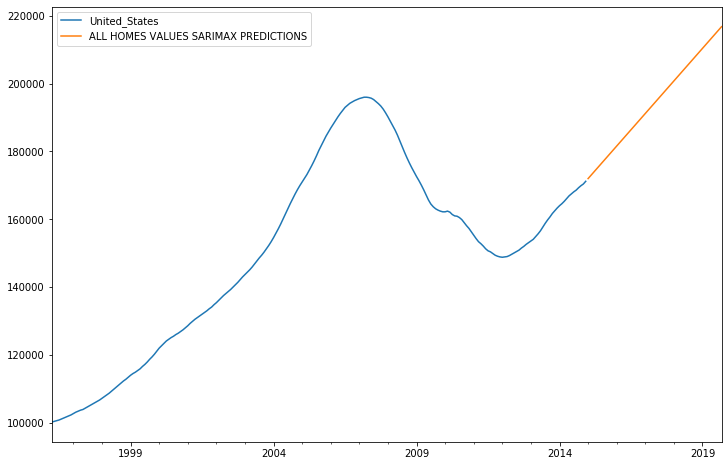

In [182]:
df_home_values_all_homes_T['United_States'].plot(legend = True, figsize=(12,8))
all_home_values_predictions.plot(legend = True)

# df_home_values_all_homes_T['United_States'].plot(figsize = (14,5))
# all_home_values_predictions.plot(figsize = (14,5))
# plt.title('US HOMES VALUE PREDICTIONS', size = 20)
# plt.xlabel('Time(Years)', size = 20)
# plt.ylabel('Home Values($)', size = 20)

plt.show()

In [183]:
homes_1B_model = SARIMAX(df_home_value_1Bedroom_T['United_States'], order=(3,1,3), seasonal_order=(1,0,2,12))

In [184]:
homes_results_1B = homes_1B_model.fit()

In [185]:
start_1B = len(df_home_value_1Bedroom_T)

In [186]:
end_1B = len(df_home_value_1Bedroom_T) + len(home_value_1Bedroom_T_Test) - 1

In [187]:
homes_1B_predictions = homes_results_1B.predict(start_1B, end_1B, typ='levels').rename('1 BEDROOM VALUES SARIMAX PREDICTIONS')

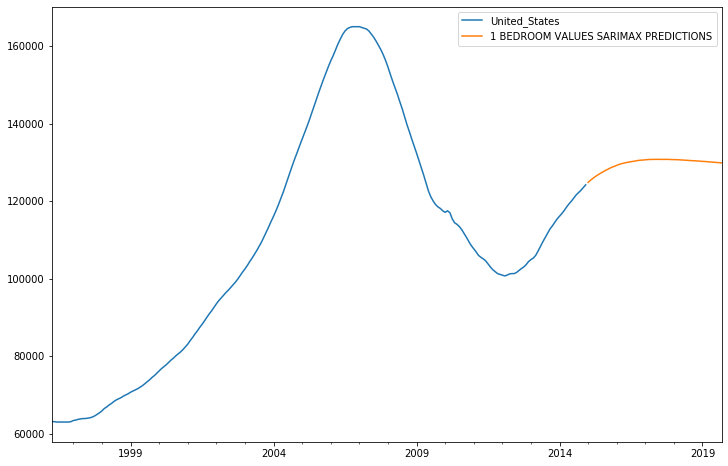

In [188]:
df_home_value_1Bedroom_T['United_States'].plot(legend = True, figsize=(12,8))
homes_1B_predictions.plot(legend = True)

In [189]:
homes_2B_model = SARIMAX(df_home_value_2Bedroom_T['United_States'], order=(0,2,1), seasonal_order=(1,0,1,12))

In [190]:
homes_results_2B = homes_2B_model.fit()

In [191]:
start_2B = len(df_home_value_2Bedroom_T)

In [192]:
end_2B = len(df_home_value_2Bedroom_T) + len(home_value_2Bedroom_T_Test) - 1

In [193]:
homes_2B_predictions = homes_results_2B.predict(start_2B, end_2B, typ='levels').rename('2 BEDROOM VALUES SARIMAX PREDICTIONS')

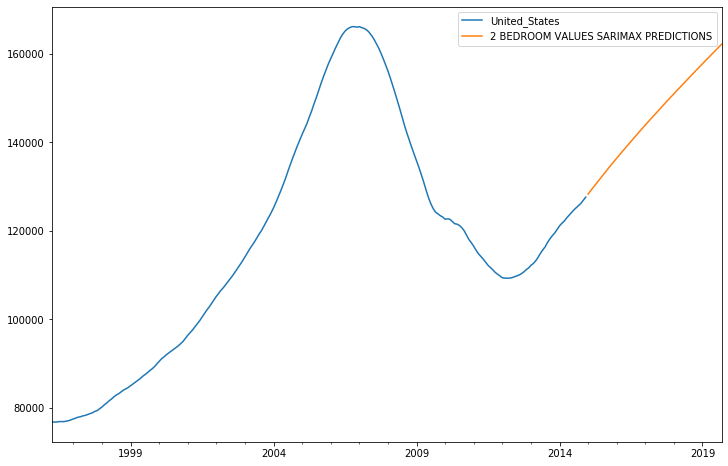

In [194]:
df_home_value_2Bedroom_T['United_States'].plot(legend = True, figsize=(12,8))
homes_2B_predictions.plot(legend = True)

In [195]:
homes_3B_model = SARIMAX(df_home_value_3Bedroom_T['United_States'], order=(0,2,0), seasonal_order=(0,0,0,12))

In [196]:
homes_results_3B = homes_3B_model.fit()

In [197]:
start_3B = len(df_home_value_3Bedroom_T)

In [198]:
end_3B = len(df_home_value_3Bedroom_T) + len(home_value_3Bedroom_T_Test) - 1

In [199]:
homes_3B_predictions = homes_results_3B.predict(start_3B, end_3B, typ='levels').rename('3 BEDROOM VALUES SARIMAX PREDICTIONS')

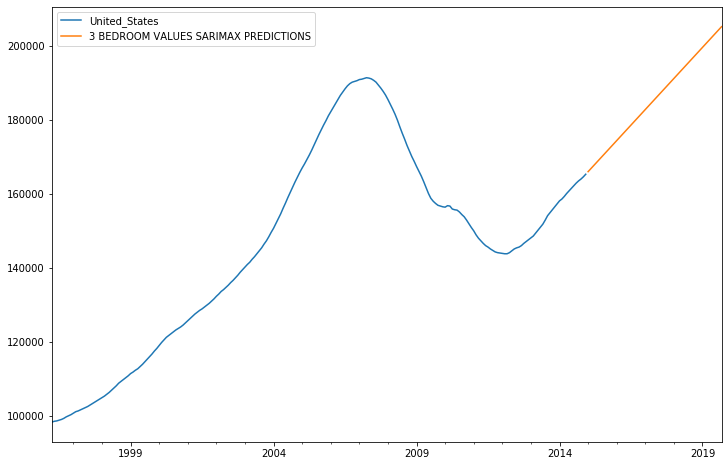

In [200]:
df_home_value_3Bedroom_T['United_States'].plot(legend = True, figsize=(12,8))
homes_3B_predictions.plot(legend = True)

In [201]:
homes_4B_model = SARIMAX(df_home_value_4Bedroom_T['United_States'], order=(2,1,1), seasonal_order=(0,0,0,12))

In [202]:
homes_results_4B = homes_4B_model.fit()

In [203]:
start_4B = len(df_home_value_4Bedroom_T)

In [204]:
end_4B = len(df_home_value_4Bedroom_T) + len(home_value_4Bedroom_T_Test) - 1

In [205]:
homes_4B_predictions = homes_results_4B.predict(start_4B, end_4B, typ='levels').rename('4 BEDROOM VALUES SARIMAX PREDICTIONS')

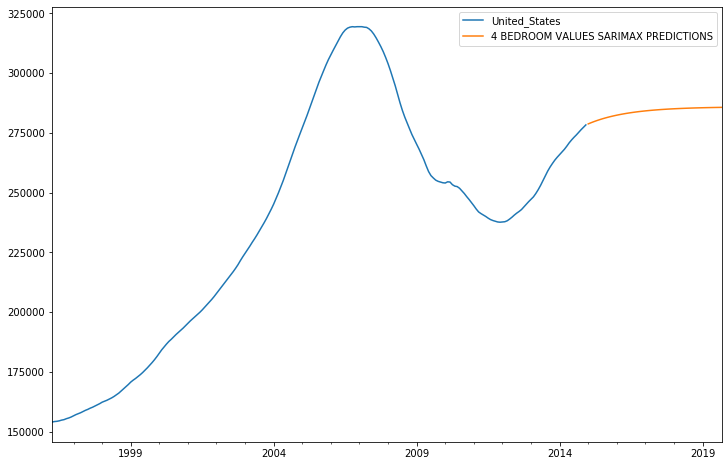

In [206]:
df_home_value_4Bedroom_T['United_States'].plot(legend = True, figsize=(12,8))
homes_4B_predictions.plot(legend = True)

In [207]:
homes_5B_model = SARIMAX(df_home_value_5BedroomOrMore_T['United_States'], order=(1,1,1), seasonal_order=(0,0,0,12))

In [208]:
homes_results_5B = homes_5B_model.fit()

In [209]:
start_5B = len(df_home_value_5BedroomOrMore_T)

In [210]:
end_5B = len(df_home_value_5BedroomOrMore_T) + len(home_value_5BedroomOrMore_T_Test) - 1

In [211]:
homes_5B_predictions = homes_results_5B.predict(start_4B, end_4B, typ='levels').rename('5 BEDROOM OR MORE VALUES SARIMAX PREDICTIONS')

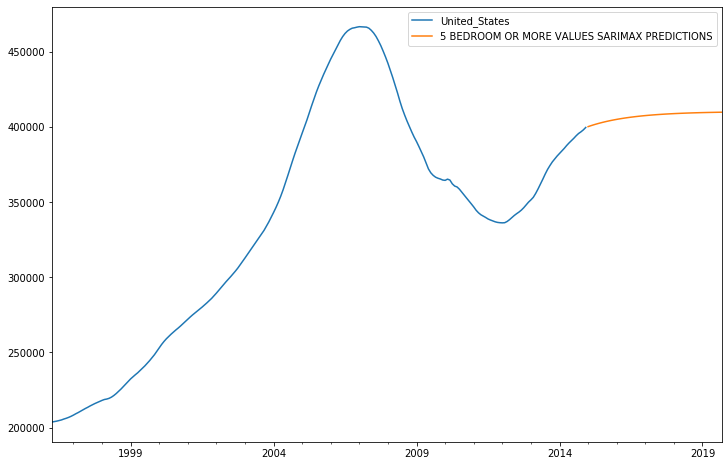

In [212]:
df_home_value_5BedroomOrMore_T['United_States'].plot(legend = True, figsize=(12,8))
homes_5B_predictions.plot(legend = True)

In [213]:
sale_prices_model = SARIMAX(df_sale_prices_T['United_States'], order=(1,1,1), seasonal_order=(1,0,0,12))

In [214]:
sale_prices_results = sale_prices_model.fit()

In [215]:
start_sale_prices = len(df_sale_prices_T)

In [216]:
end_sale_prices = len(df_sale_prices_T) + len(sale_prices_T_Test) - 1

In [217]:
sale_prices_predictions = sale_prices_results.predict(start_sale_prices, end_sale_prices, typ='levels').rename('HOUSE SALE PRICES SARIMAX PREDICTIONS')

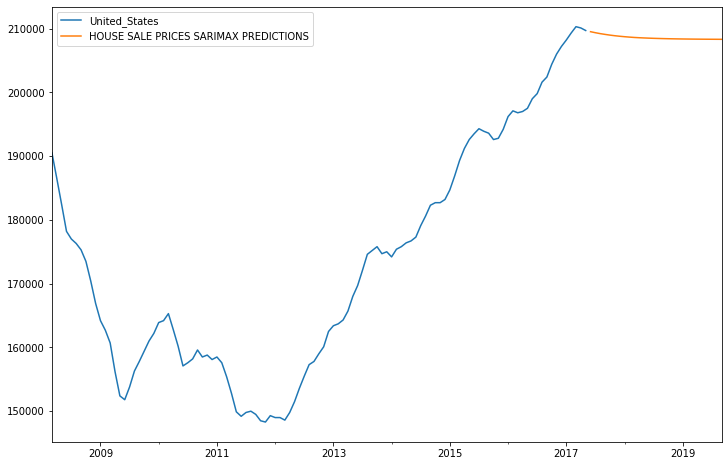

In [218]:
df_sale_prices_T['United_States'].plot(legend = True, figsize=(12,8))
sale_prices_predictions.plot(legend = True)

## DEEP LEARNING FOR TIME SERIES FORECASTING(ZILLOW HOME VALUES)

In [219]:
home_values_all_homes_T.drop(columns=['wn', 'res_arima1'], inplace = True)
home_value_1Bedroom_T.drop(columns=['wn', 'res_arima1'], inplace = True)
home_value_2Bedroom_T.drop(columns=['wn', 'res_arima1'], inplace = True)
home_value_3Bedroom_T.drop(columns=['wn', 'res_arima1'], inplace = True)
home_value_4Bedroom_T.drop(columns=['wn', 'res_arima1'], inplace = True)
home_value_5BedroomOrMore_T.drop(columns=['wn', 'res_arima1'], inplace = True)
sale_prices_T.drop(columns=['wn', 'res_arima1'], inplace = True)

In [220]:
# Forecast 1 year into the future
len(home_values_all_homes_T) - 12

270

In [221]:
home_values_all_homes_train = home_values_all_homes_T.iloc[:269]

In [222]:
home_values_all_homes_test = home_values_all_homes_T.iloc[269:]

In [223]:
len(home_value_1Bedroom_T) - 12

270

In [224]:
home_values_1Bedroom_train = home_value_1Bedroom_T.iloc[:269]

In [225]:
home_values_1Bedroom_test = home_value_1Bedroom_T.iloc[269:]

In [226]:
len(home_value_2Bedroom_T) - 12

270

In [227]:
home_values_2Bedroom_train = home_value_2Bedroom_T.iloc[:269]

In [228]:
home_values_2Bedroom_test = home_value_2Bedroom_T.iloc[269:]

In [229]:
len(home_value_3Bedroom_T) - 12

270

In [230]:
home_values_3Bedroom_train = home_value_3Bedroom_T.iloc[:269]

In [231]:
home_values_3Bedroom_test = home_value_3Bedroom_T.iloc[269:]

In [232]:
len(home_value_4Bedroom_T) - 12

270

In [233]:
home_values_4Bedroom_train = home_value_4Bedroom_T.iloc[:269]

In [234]:
home_values_4Bedroom_test = home_value_4Bedroom_T.iloc[269:]

In [235]:
len(home_value_5BedroomOrMore_T) - 12

270

In [236]:
home_values_5BedroomOrMore_train = home_value_5BedroomOrMore_T.iloc[:269]

In [237]:
home_values_5BedroomOrMore_test = home_value_5BedroomOrMore_T.iloc[269:]

In [238]:
len(sale_prices_T) - 12

127

In [239]:
sale_prices_train = sale_prices_T.iloc[:126]

In [240]:
sale_prices_test = sale_prices_T.iloc[126:]

In [241]:
from sklearn.preprocessing import MinMaxScaler

In [242]:
# Normalize the data
scaler = MinMaxScaler()

In [243]:
scaler.fit(home_values_all_homes_train)
scaled_all_train = scaler.transform(home_values_all_homes_train)
scaled_all_test = scaler.transform(home_values_all_homes_test)

In [244]:
scaler.fit(home_values_1Bedroom_train)
scaled_1Bedroom_train = scaler.transform(home_values_1Bedroom_train)
scaled_1Bedroom_test = scaler.transform(home_values_1Bedroom_test)

In [245]:
scaler.fit(home_values_2Bedroom_train)
scaled_2Bedroom_train = scaler.transform(home_values_2Bedroom_train)
scaled_2Bedroom_test = scaler.transform(home_values_2Bedroom_test)

In [246]:
scaler.fit(home_values_3Bedroom_train)
scaled_3Bedroom_train = scaler.transform(home_values_3Bedroom_train)
scaled_3Bedroom_test = scaler.transform(home_values_3Bedroom_test)

In [247]:
scaler.fit(home_values_4Bedroom_train)
scaled_4Bedroom_train = scaler.transform(home_values_4Bedroom_train)
scaled_4Bedroom_test = scaler.transform(home_values_4Bedroom_test)

In [248]:
scaler.fit(home_values_5BedroomOrMore_train)
scaled_5BedroomOrMore_train = scaler.transform(home_values_5BedroomOrMore_train)
scaled_5BedroomOrMore_test = scaler.transform(home_values_5BedroomOrMore_test)

In [249]:
scaler.fit(sale_prices_train)
scaled_sale_prices_train = scaler.transform(sale_prices_train)
scaled_sale_prices_test = scaler.transform(sale_prices_test)

In [250]:
from keras.preprocessing.sequence import TimeseriesGenerator

Using TensorFlow backend.


In [251]:
len(scaled_all_train)

269

In [252]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit_transform(scaled_all_train)

array([[0.        ],
       [0.00169779],
       [0.00339559],
       [0.00509338],
       [0.00764007],
       [0.01018676],
       [0.01273345],
       [0.01528014],
       [0.01782683],
       [0.02122241],
       [0.024618  ],
       [0.02716469],
       [0.02971138],
       [0.03140917],
       [0.03480475],
       [0.03820034],
       [0.04159593],
       [0.04499151],
       [0.0483871 ],
       [0.05178268],
       [0.05517827],
       [0.05942275],
       [0.06366723],
       [0.06791171],
       [0.0721562 ],
       [0.07724958],
       [0.08234295],
       [0.08743633],
       [0.09252971],
       [0.09762309],
       [0.10271647],
       [0.10696095],
       [0.11205433],
       [0.11714771],
       [0.12139219],
       [0.12478778],
       [0.12903226],
       [0.13327674],
       [0.13921902],
       [0.14431239],
       [0.15025467],
       [0.15704584],
       [0.16298812],
       [0.16977929],
       [0.17741935],
       [0.18505942],
       [0.1910017 ],
       [0.196

In [253]:
n_input = 12
n_features = 1

all_homes_generator = TimeseriesGenerator(scaled_all_train, scaled_all_train, length = n_input, batch_size=1)
Bedroom1_generator = TimeseriesGenerator(scaled_1Bedroom_train, scaled_1Bedroom_train, length = n_input, batch_size=1)
Bedroom2_generator = TimeseriesGenerator(scaled_2Bedroom_train, scaled_2Bedroom_train, length = n_input, batch_size=1)
Bedroom3_generator = TimeseriesGenerator(scaled_3Bedroom_train, scaled_3Bedroom_train, length = n_input, batch_size=1)
Bedroom4_generator = TimeseriesGenerator(scaled_4Bedroom_train, scaled_4Bedroom_train, length = n_input, batch_size=1)
Bedroom5_generator = TimeseriesGenerator(scaled_5BedroomOrMore_train, scaled_5BedroomOrMore_train, length = n_input, batch_size=1)
sale_prices_generator = TimeseriesGenerator(scaled_sale_prices_train, scaled_sale_prices_train, length = n_input, batch_size=1)

In [254]:
all_homes_generator[0]

(array([[[0.        ],
         [0.00169779],
         [0.00339559],
         [0.00509338],
         [0.00764007],
         [0.01018676],
         [0.01273345],
         [0.01528014],
         [0.01782683],
         [0.02122241],
         [0.024618  ],
         [0.02716469]]]), array([[0.02971138]]))

In [255]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [256]:
model = Sequential()

model.add(LSTM(150, activation='relu', input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [257]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [258]:
model.fit_generator(all_homes_generator,epochs=25)

Epoch 1/25
257/257 [==============================] - 2s 8ms/step - loss: 0.0162
Epoch 2/25
257/257 [==============================] - 1s 6ms/step - loss: 0.0025
Epoch 3/25
257/257 [==============================] - 1s 6ms/step - loss: 0.0021
Epoch 4/25
257/257 [==============================] - 1s 6ms/step - loss: 0.0014
Epoch 5/25
257/257 [==============================] - 1s 6ms/step - loss: 8.9829e-04
Epoch 6/25
257/257 [==============================] - 1s 6ms/step - loss: 6.1643e-04
Epoch 7/25
257/257 [==============================] - 1s 6ms/step - loss: 5.1735e-04
Epoch 8/25
257/257 [==============================] - 1s 6ms/step - loss: 5.0366e-04
Epoch 9/25
257/257 [==============================] - 1s 6ms/step - loss: 3.2844e-04
Epoch 10/25
257/257 [==============================] - 1s 6ms/step - loss: 2.3455e-04
Epoch 11/25
257/257 [==============================] - 1s 6ms/step - loss: 2.1521e-04
Epoch 12/25
257/257 [==============================] - 1s 6ms/step - loss: 2.07

In [259]:
model.history.history.keys()

dict_keys(['loss'])

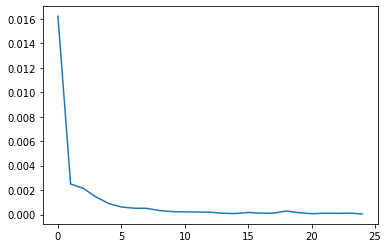

In [260]:
loss = model.history.history['loss']
plt.plot(range(len(loss)), loss)

In [261]:
# 12 history steps ---> step 13
# last 12 points train ---> point 1 of test data

In [262]:
first_eval_batch = scaled_all_train[-12:]

In [263]:
first_eval_batch

array([[0.87606112],
       [0.88624788],
       [0.89813243],
       [0.90662139],
       [0.91935484],
       [0.93463497],
       [0.94906621],
       [0.95925297],
       [0.97113752],
       [0.98132428],
       [0.99066214],
       [1.        ]])

In [264]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [265]:
model.predict(first_eval_batch)

array([[1.0135968]], dtype=float32)

In [266]:
def predicted_values(train_data, num_inputs, num_features, test_data):
    test_prediction = []


    # last n_input points from the training set
    first_eval_batch = train_data[-num_inputs:]

    # reshape to the format that the RNN wants
    current_batch = first_eval_batch.reshape((1,num_inputs, num_features))

    # how far into the future will I forecast
    for i in range(len(test_data)):
    
        # One timestamp ahead of historical 12 points
        current_pred = model.predict(current_batch)[0]
    
        # store that prediction
        test_prediction.append(current_pred)
    
        #update current batch to include prediction
        current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)
    return test_prediction

In [267]:
home_values_test_pred = predicted_values(scaled_all_train, n_input, n_features, home_values_all_homes_test)

In [268]:
home_values_test_pred

[array([1.0135968], dtype=float32),
 array([1.0228863], dtype=float32),
 array([1.031894], dtype=float32),
 array([1.0406605], dtype=float32),
 array([1.0487512], dtype=float32),
 array([1.055754], dtype=float32),
 array([1.0614257], dtype=float32),
 array([1.0659763], dtype=float32),
 array([1.0689142], dtype=float32),
 array([1.0700516], dtype=float32),
 array([1.0689847], dtype=float32),
 array([1.0654236], dtype=float32),
 array([1.0591172], dtype=float32)]

In [269]:
true_predictions = scaler.inverse_transform(home_values_test_pred)

In [270]:
true_predictions

array([[230097.25959301],
       [230846.92249298],
       [231573.84326458],
       [232281.30239248],
       [232934.22466516],
       [233499.34346676],
       [233957.05285072],
       [234324.28435087],
       [234561.37392521],
       [234653.16015482],
       [234567.06907749],
       [234279.68515158],
       [233770.75787783]])

In [271]:
home_values_all_homes_test['Predictions For All Home Values'] = true_predictions

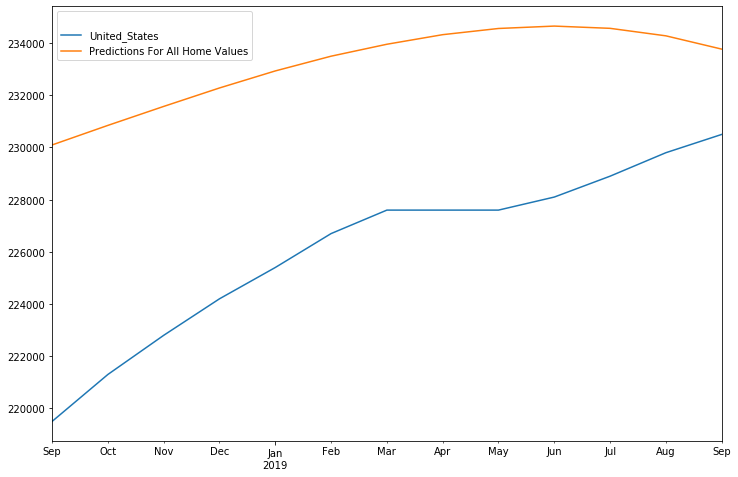

In [272]:
home_values_all_homes_test.plot(figsize=(12,8))

In [273]:
model2 = Sequential()

model2.add(LSTM(150, activation='relu', input_shape=(n_input,n_features)))
model2.add(Dense(1))
model2.compile(optimizer='adam',loss='mse')

In [274]:
model2.fit_generator(Bedroom1_generator,epochs=25)

Epoch 1/25
257/257 [==============================] - 2s 8ms/step - loss: 0.0213
Epoch 2/25
257/257 [==============================] - 1s 6ms/step - loss: 0.0025
Epoch 3/25
257/257 [==============================] - 1s 6ms/step - loss: 0.0014
Epoch 4/25
257/257 [==============================] - 1s 5ms/step - loss: 9.7155e-04
Epoch 5/25
257/257 [==============================] - 1s 6ms/step - loss: 5.7360e-04
Epoch 6/25
257/257 [==============================] - 1s 6ms/step - loss: 4.3174e-04
Epoch 7/25
257/257 [==============================] - 1s 6ms/step - loss: 6.0349e-04
Epoch 8/25
257/257 [==============================] - 1s 6ms/step - loss: 2.0144e-04
Epoch 9/25
257/257 [==============================] - 1s 6ms/step - loss: 2.7376e-04
Epoch 10/25
257/257 [==============================] - 1s 6ms/step - loss: 2.3363e-04
Epoch 11/25
257/257 [==============================] - 1s 6ms/step - loss: 3.1596e-04
Epoch 12/25
257/257 [==============================] - 1s 6ms/step - loss: 

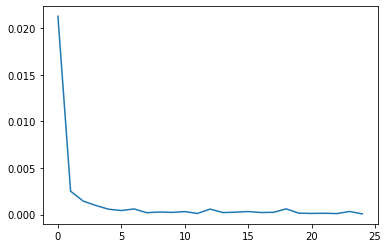

In [275]:
loss = model2.history.history['loss']
plt.plot(range(len(loss)), loss)

In [276]:
home_1Bedroom_test_pred = predicted_values(scaled_1Bedroom_train, n_input, n_features, scaled_1Bedroom_test)

In [277]:
true_predictions2 = scaler.inverse_transform(home_1Bedroom_test_pred)

In [278]:
home_values_1Bedroom_test['Predictions 1 Bedroom Home Values'] = true_predictions2

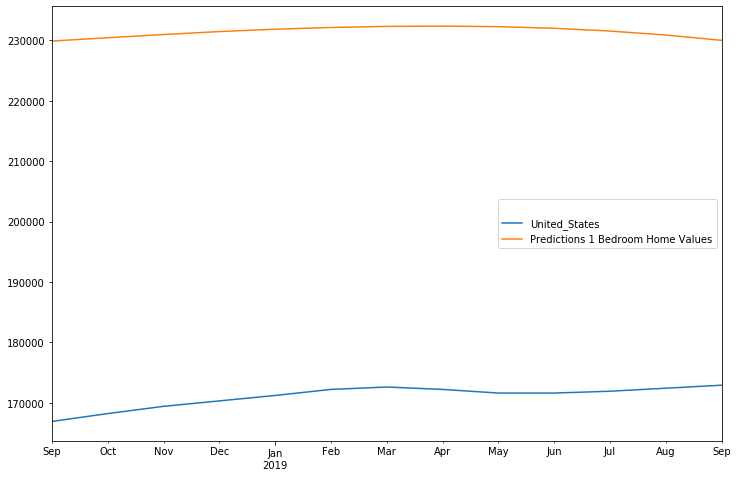

In [279]:
home_values_1Bedroom_test.plot(figsize=(12,8))

In [280]:
model3 = Sequential()

model3.add(LSTM(150, activation='relu', input_shape=(n_input,n_features)))
model3.add(Dense(1))
model3.compile(optimizer='adam',loss='mse')

In [281]:
model3.fit_generator(Bedroom2_generator,epochs=25)

Epoch 1/25
257/257 [==============================] - 2s 8ms/step - loss: 0.0181
Epoch 2/25
257/257 [==============================] - 1s 6ms/step - loss: 0.0045
Epoch 3/25
257/257 [==============================] - 1s 6ms/step - loss: 0.0030
Epoch 4/25
257/257 [==============================] - 1s 6ms/step - loss: 0.0036
Epoch 5/25
257/257 [==============================] - 1s 6ms/step - loss: 0.0022
Epoch 6/25
257/257 [==============================] - 1s 6ms/step - loss: 0.0011
Epoch 7/25
257/257 [==============================] - 1s 6ms/step - loss: 4.8408e-04
Epoch 8/25
257/257 [==============================] - 2s 6ms/step - loss: 5.3846e-04
Epoch 9/25
257/257 [==============================] - 2s 7ms/step - loss: 3.3564e-04
Epoch 10/25
257/257 [==============================] - 1s 6ms/step - loss: 2.0079e-04
Epoch 11/25
257/257 [==============================] - 2s 6ms/step - loss: 2.9241e-04
Epoch 12/25
257/257 [==============================] - 1s 6ms/step - loss: 1.8371e-04
E

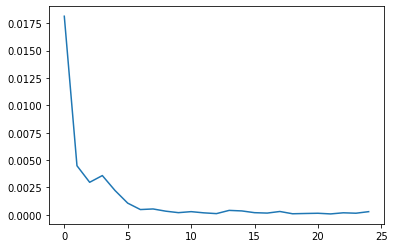

In [282]:
loss = model3.history.history['loss']
plt.plot(range(len(loss)), loss)

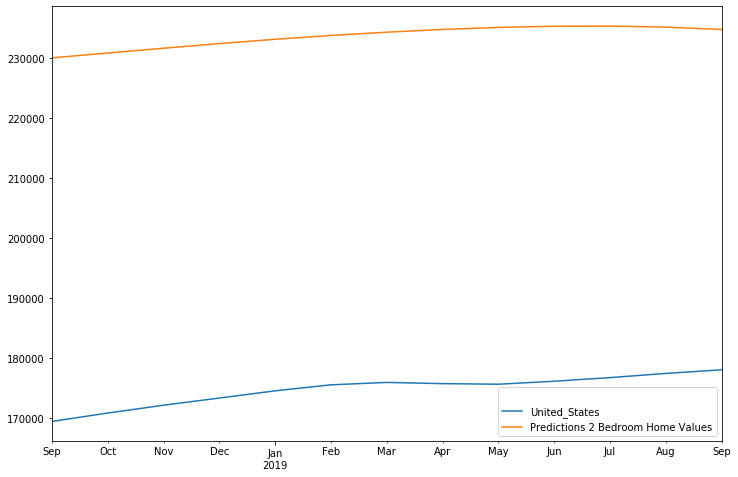

In [283]:
home_2Bedroom_test_pred = predicted_values(scaled_2Bedroom_train, n_input, n_features, scaled_2Bedroom_test)
true_predictions3 = scaler.inverse_transform(home_2Bedroom_test_pred)
home_values_2Bedroom_test['Predictions 2 Bedroom Home Values'] = true_predictions3
home_values_2Bedroom_test.plot(figsize=(12,8))

In [284]:
model4 = Sequential()

model4.add(LSTM(150, activation='relu', input_shape=(n_input,n_features)))
model4.add(Dense(1))
model4.compile(optimizer='adam',loss='mse')

In [285]:
model4.fit_generator(Bedroom3_generator,epochs=25)

Epoch 1/25
257/257 [==============================] - 2s 8ms/step - loss: 0.0106
Epoch 2/25
257/257 [==============================] - 1s 6ms/step - loss: 0.0023
Epoch 3/25
257/257 [==============================] - 1s 6ms/step - loss: 0.0016
Epoch 4/25
257/257 [==============================] - 1s 6ms/step - loss: 0.0014
Epoch 5/25
257/257 [==============================] - 2s 6ms/step - loss: 7.7080e-04
Epoch 6/25
257/257 [==============================] - 2s 6ms/step - loss: 6.2840e-04
Epoch 7/25
257/257 [==============================] - 1s 6ms/step - loss: 6.4175e-04
Epoch 8/25
257/257 [==============================] - 1s 6ms/step - loss: 3.2939e-04
Epoch 9/25
257/257 [==============================] - 1s 6ms/step - loss: 2.4916e-04
Epoch 10/25
257/257 [==============================] - 1s 6ms/step - loss: 3.0225e-04
Epoch 11/25
257/257 [==============================] - 1s 6ms/step - loss: 1.5174e-04
Epoch 12/25
257/257 [==============================] - 1s 6ms/step - loss: 1.00

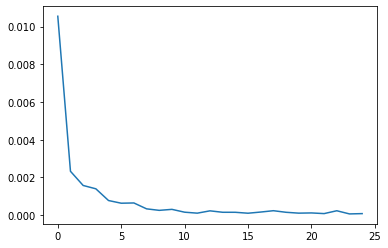

In [286]:
loss = model4.history.history['loss']
plt.plot(range(len(loss)), loss)

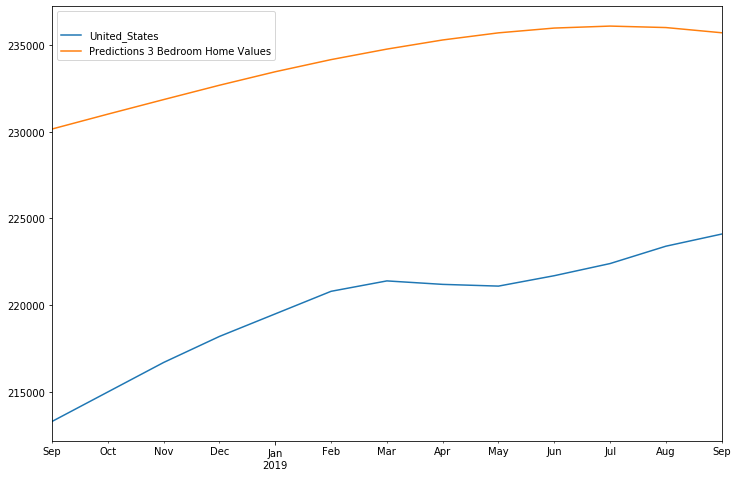

In [287]:
home_3Bedroom_test_pred = predicted_values(scaled_3Bedroom_train, n_input, n_features, scaled_3Bedroom_test)
true_predictions4 = scaler.inverse_transform(home_3Bedroom_test_pred)
home_values_3Bedroom_test['Predictions 3 Bedroom Home Values'] = true_predictions4
home_values_3Bedroom_test.plot(figsize=(12,8))

In [288]:
model5 = Sequential()

model5.add(LSTM(150, activation='relu', input_shape=(n_input,n_features)))
model5.add(Dense(1))
model5.compile(optimizer='adam',loss='mse')

In [289]:
model5.fit_generator(Bedroom4_generator,epochs=25)

Epoch 1/25
257/257 [==============================] - 2s 8ms/step - loss: 0.0172
Epoch 2/25
257/257 [==============================] - 2s 6ms/step - loss: 0.0021
Epoch 3/25
257/257 [==============================] - 1s 6ms/step - loss: 0.0019
Epoch 4/25
257/257 [==============================] - 1s 6ms/step - loss: 0.0014
Epoch 5/25
257/257 [==============================] - 2s 6ms/step - loss: 0.0011
Epoch 6/25
257/257 [==============================] - 2s 6ms/step - loss: 8.3606e-04
Epoch 7/25
257/257 [==============================] - 2s 6ms/step - loss: 4.0016e-04
Epoch 8/25
257/257 [==============================] - 1s 6ms/step - loss: 6.5081e-04
Epoch 9/25
257/257 [==============================] - 1s 6ms/step - loss: 2.8907e-04
Epoch 10/25
257/257 [==============================] - 1s 6ms/step - loss: 1.8130e-04
Epoch 11/25
257/257 [==============================] - 1s 6ms/step - loss: 2.2832e-04
Epoch 12/25
257/257 [==============================] - 1s 6ms/step - loss: 2.4788e-

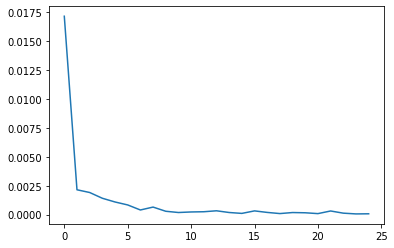

In [290]:
loss = model5.history.history['loss']
plt.plot(range(len(loss)), loss)

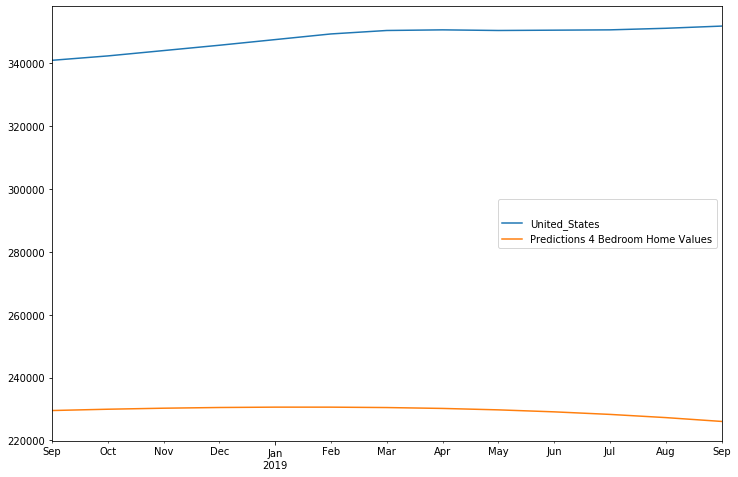

In [291]:
home_4Bedroom_test_pred = predicted_values(scaled_4Bedroom_train, n_input, n_features, scaled_4Bedroom_test)
true_predictions5 = scaler.inverse_transform(home_4Bedroom_test_pred)
home_values_4Bedroom_test['Predictions 4 Bedroom Home Values'] = true_predictions5
home_values_4Bedroom_test.plot(figsize=(12,8))

In [292]:
model6 = Sequential()

model6.add(LSTM(150, activation='relu', input_shape=(n_input,n_features)))
model6.add(Dense(1))
model6.compile(optimizer='adam',loss='mse')

In [293]:
model6.fit_generator(Bedroom4_generator,epochs=25)

Epoch 1/25
257/257 [==============================] - 3s 11ms/step - loss: 0.0137
Epoch 2/25
257/257 [==============================] - 2s 7ms/step - loss: 0.0017
Epoch 3/25
257/257 [==============================] - 2s 7ms/step - loss: 0.0022
Epoch 4/25
257/257 [==============================] - 2s 7ms/step - loss: 0.0011
Epoch 5/25
257/257 [==============================] - 1s 6ms/step - loss: 7.9896e-04
Epoch 6/25
257/257 [==============================] - 1s 6ms/step - loss: 9.6590e-04
Epoch 7/25
257/257 [==============================] - 1s 6ms/step - loss: 4.1200e-04
Epoch 8/25
257/257 [==============================] - 1s 6ms/step - loss: 2.7388e-04
Epoch 9/25
257/257 [==============================] - 2s 6ms/step - loss: 5.4270e-04
Epoch 10/25
257/257 [==============================] - 2s 6ms/step - loss: 4.2522e-04
Epoch 11/25
257/257 [==============================] - 2s 6ms/step - loss: 2.0049e-04
Epoch 12/25
257/257 [==============================] - 1s 6ms/step - loss: 1.9

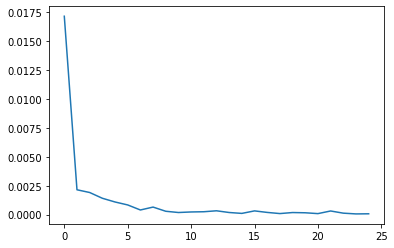

In [294]:
loss = model5.history.history['loss']
plt.plot(range(len(loss)), loss)

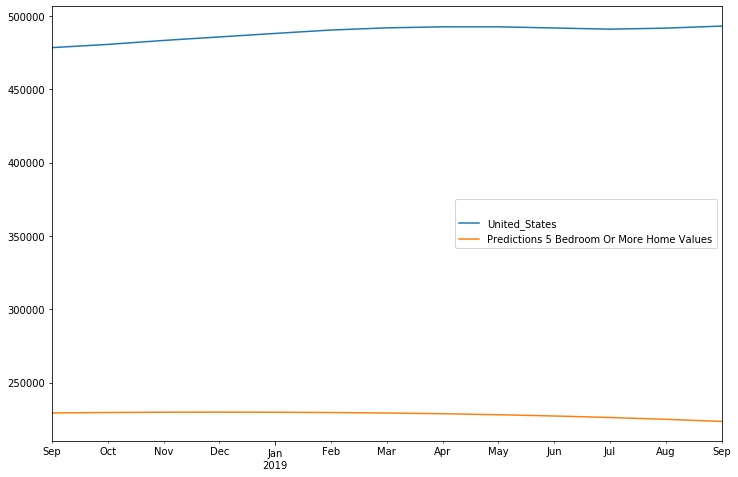

In [295]:
home_5Bedroom_test_pred = predicted_values(scaled_5BedroomOrMore_train, n_input, n_features, scaled_5BedroomOrMore_test)
true_predictions6 = scaler.inverse_transform(home_5Bedroom_test_pred)
home_values_5BedroomOrMore_test['Predictions 5 Bedroom Or More Home Values'] = true_predictions6
home_values_5BedroomOrMore_test.plot(figsize=(12,8))

In [296]:
model7 = Sequential()

model7.add(LSTM(150, activation='relu', input_shape=(n_input,n_features)))
model7.add(Dense(1))
model7.compile(optimizer='adam',loss='mse')

In [297]:
model7.fit_generator(sale_prices_generator,epochs=25)

Epoch 1/25
114/114 [==============================] - 1s 9ms/step - loss: 0.0428
Epoch 2/25
114/114 [==============================] - 1s 6ms/step - loss: 0.0053
Epoch 3/25
114/114 [==============================] - 1s 6ms/step - loss: 0.0054
Epoch 4/25
114/114 [==============================] - 1s 6ms/step - loss: 0.0041
Epoch 5/25
114/114 [==============================] - 1s 6ms/step - loss: 0.0040
Epoch 6/25
114/114 [==============================] - 1s 6ms/step - loss: 0.0031
Epoch 7/25
114/114 [==============================] - 1s 6ms/step - loss: 0.0031
Epoch 8/25
114/114 [==============================] - 1s 6ms/step - loss: 0.0025
Epoch 9/25
114/114 [==============================] - 1s 6ms/step - loss: 0.0018
Epoch 10/25
114/114 [==============================] - 1s 6ms/step - loss: 0.0018
Epoch 11/25
114/114 [==============================] - 1s 6ms/step - loss: 0.0023
Epoch 12/25
114/114 [==============================] - 1s 5ms/step - loss: 0.0020
Epoch 13/25
114/114 [====

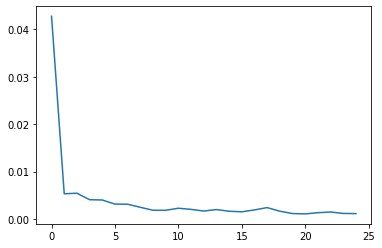

In [298]:
loss = model7.history.history['loss']
plt.plot(range(len(loss)), loss)

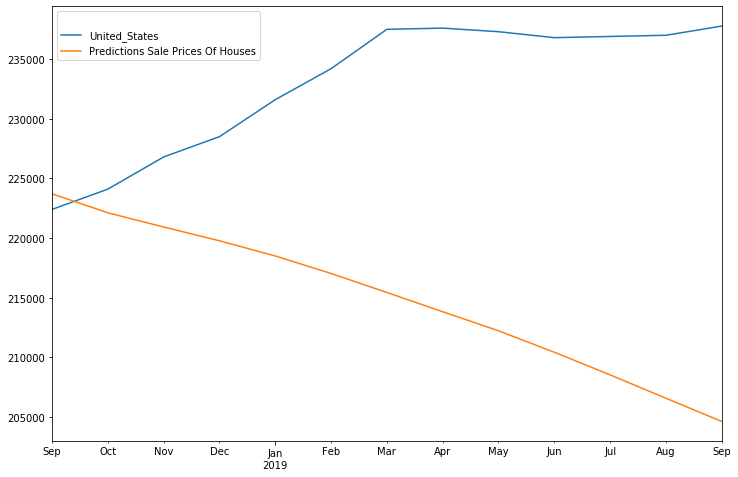

In [299]:
sale_prices_pred = predicted_values(scaled_sale_prices_train, n_input, n_features, scaled_sale_prices_test)
true_predictions7 = scaler.inverse_transform(sale_prices_pred)
sale_prices_test['Predictions Sale Prices Of Houses'] = true_predictions7
sale_prices_test.plot(figsize=(12,8))

## FACEBOOK'S PROPHET LIBRARY

In [300]:
from fbprophet import Prophet

In [301]:
home_values_all_homes_T.reset_index(inplace=True)
home_value_1Bedroom_T.reset_index(inplace=True)
home_value_2Bedroom_T.reset_index(inplace=True)
home_value_3Bedroom_T.reset_index(inplace=True)
home_value_4Bedroom_T.reset_index(inplace=True)
home_value_5BedroomOrMore_T.reset_index(inplace=True)
sale_prices_T.reset_index(inplace=True)

In [302]:
home_values_all_homes_T.columns = ['ds', 'y']
home_value_1Bedroom_T.columns = ['ds', 'y']
home_value_2Bedroom_T.columns = ['ds', 'y']
home_value_3Bedroom_T.columns = ['ds', 'y']
home_value_4Bedroom_T.columns = ['ds', 'y']
home_value_5BedroomOrMore_T.columns = ['ds', 'y']
sale_prices_T.columns = ['ds', 'y']

In [303]:
all_homes_model = Prophet()
all_homes_model.fit(home_values_all_homes_T)
homes_1Bedroom = Prophet()
homes_1Bedroom.fit(home_value_1Bedroom_T)
homes_2Bedroom = Prophet()
homes_2Bedroom.fit(home_value_2Bedroom_T)
homes_3Bedroom = Prophet()
homes_3Bedroom.fit(home_value_3Bedroom_T)
homes_4Bedroom = Prophet()
homes_4Bedroom.fit(home_value_4Bedroom_T)
homes_5Bedroom = Prophet()
homes_5Bedroom.fit(home_value_5BedroomOrMore_T)
sale_prices = Prophet()
sale_prices.fit(sale_prices_T)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disab

In [304]:
# PLACEHOLDER TO HOLD FUTURE PREDICTIONS

In [305]:
all_homes_future = all_homes_model.make_future_dataframe(periods=24, freq='MS')
homes_1Bedroom_future = homes_1Bedroom.make_future_dataframe(periods=24, freq='MS')
homes_2Bedroom_future = homes_2Bedroom.make_future_dataframe(periods=24, freq='MS')
homes_3Bedroom_future = homes_3Bedroom.make_future_dataframe(periods=24, freq='MS')
homes_4Bedroom_future = homes_4Bedroom.make_future_dataframe(periods=24, freq='MS')
homes_5Bedroom_future = homes_5Bedroom.make_future_dataframe(periods=24, freq='MS')
sale_prices_future = sale_prices.make_future_dataframe(periods=24, freq='MS')

In [306]:
all_homes_forecast = all_homes_model.predict(all_homes_future)
homes_1Bedroom_forecast = homes_1Bedroom.predict(homes_1Bedroom_future)
homes_2Bedroom_forecast = homes_2Bedroom.predict(homes_2Bedroom_future)
homes_3Bedroom_forecast = homes_3Bedroom.predict(homes_3Bedroom_future)
homes_4Bedroom_forecast = homes_4Bedroom.predict(homes_4Bedroom_future)
homes_5Bedroom_forecast = homes_5Bedroom.predict(homes_5Bedroom_future)
sale_prices_forecast = sale_prices.predict(sale_prices_future)

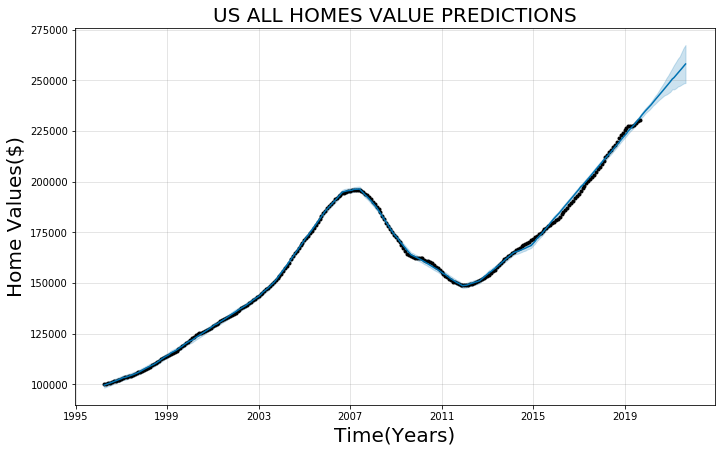

In [307]:
all_homes_model.plot(all_homes_forecast)
plt.title('US ALL HOMES VALUE PREDICTIONS', size = 20)
plt.xlabel('Time(Years)', size = 20)
plt.ylabel('Home Values($)', size = 20)
plt.show()

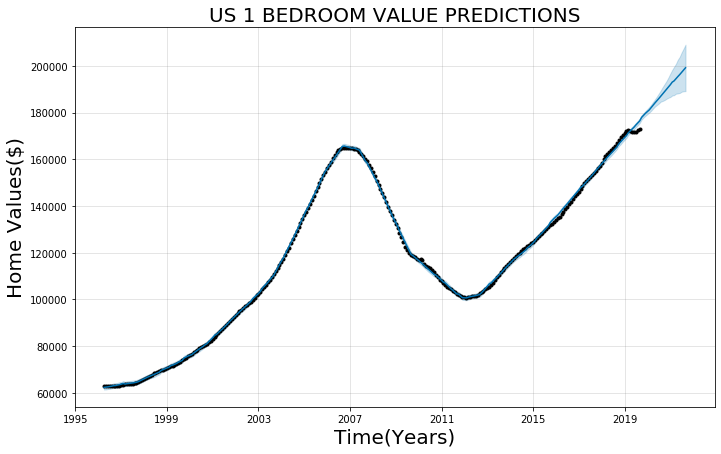

In [308]:
homes_1Bedroom.plot(homes_1Bedroom_forecast)
plt.title('US 1 BEDROOM VALUE PREDICTIONS', size = 20)
plt.xlabel('Time(Years)', size = 20)
plt.ylabel('Home Values($)', size = 20)
plt.show()

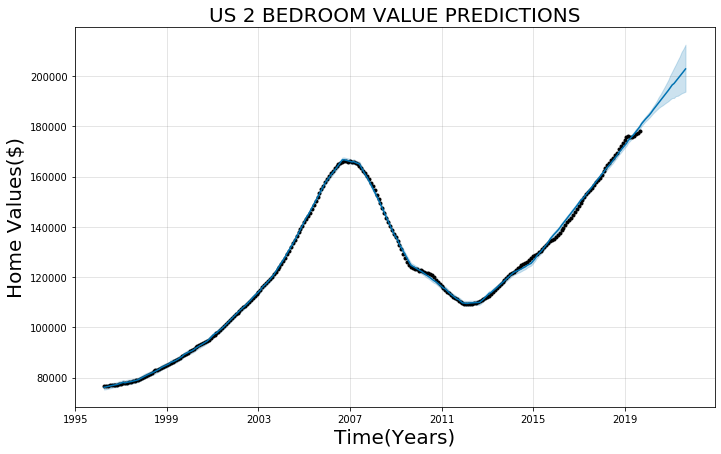

In [309]:
homes_2Bedroom.plot(homes_2Bedroom_forecast)
plt.title('US 2 BEDROOM VALUE PREDICTIONS', size = 20)
plt.xlabel('Time(Years)', size = 20)
plt.ylabel('Home Values($)', size = 20)
plt.show()

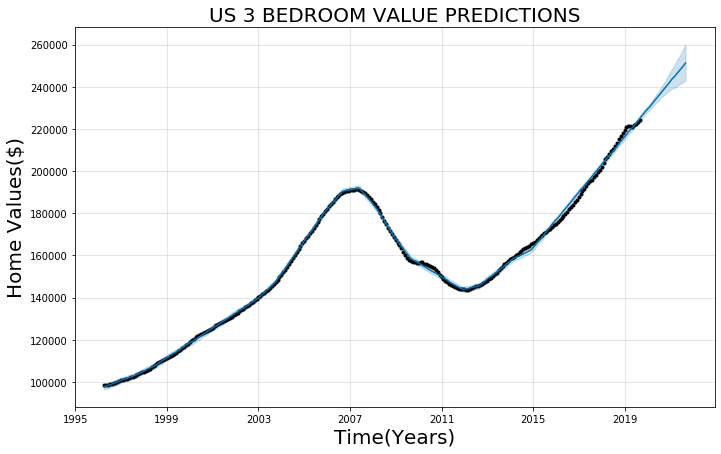

In [310]:
homes_3Bedroom.plot(homes_3Bedroom_forecast)
plt.title('US 3 BEDROOM VALUE PREDICTIONS', size = 20)
plt.xlabel('Time(Years)', size = 20)
plt.ylabel('Home Values($)', size = 20)
plt.show()

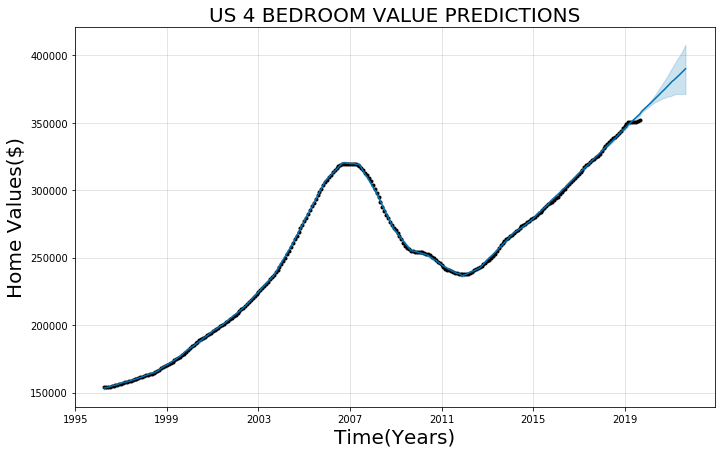

In [311]:
homes_4Bedroom.plot(homes_4Bedroom_forecast)
plt.title('US 4 BEDROOM VALUE PREDICTIONS', size = 20)
plt.xlabel('Time(Years)', size = 20)
plt.ylabel('Home Values($)', size = 20)
plt.show()

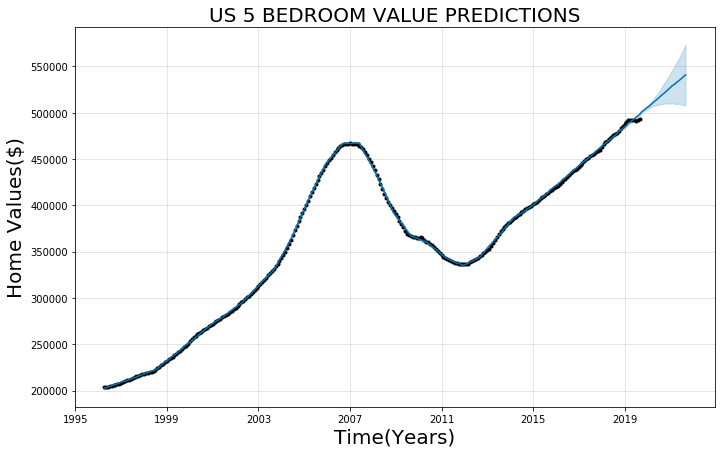

In [312]:
homes_5Bedroom.plot(homes_5Bedroom_forecast)
plt.title('US 5 BEDROOM VALUE PREDICTIONS', size = 20)
plt.xlabel('Time(Years)', size = 20)
plt.ylabel('Home Values($)', size = 20)
plt.show()

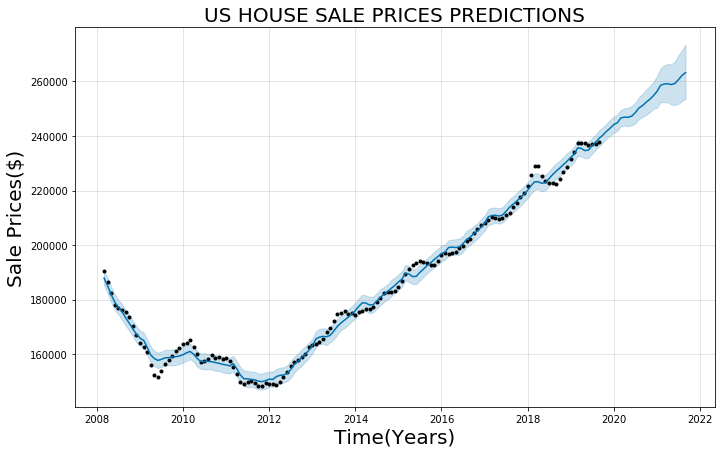

In [313]:
sale_prices.plot(sale_prices_forecast)
plt.title('US HOUSE SALE PRICES PREDICTIONS', size = 20)
plt.xlabel('Time(Years)', size = 20)
plt.ylabel('Sale Prices($)', size = 20)
plt.show()